In [ ]:
#@title # **0. Import libaries**
!pip install pywaffle
!pip install optbinning

import itertools
from collections import Counter


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import tabulate


from imblearn.over_sampling import SMOTE, SVMSMOTE, ADASYN  
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import HTML, display
from IPython.core.interactiveshell import InteractiveShell
from lightgbm import LGBMClassifier
from numpy import mean, std
from optbinning import OptimalBinning
from pywaffle import Waffle
from scipy.ndimage.filters import gaussian_filter1d
from scipy import stats
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import (RandomizedSearchCV, RepeatedKFold, RepeatedStratifiedKFold,
                                     cross_val_score, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, QuantileTransformer, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC

from xgboost import XGBClassifier



     |████████████████████████████████| 565 kB 2.7 MB/s 
     |████████████████████████████████| 218 kB 2.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 164 kB 50.8 MB/s 
     |████████████████████████████████| 15.6 MB 24.0 MB/s 
     |████████████████████████████████| 1.1 MB 41.1 MB/s 
  Created wheel for accumulation-tree: filename=accumulation_tree-0.6.2-cp37-cp37m-linux_x86_64.whl size=234192 sha256=1d9bb4970347b99246ff7bf21f18cd823ce2d7e357d1aad830306a169a2402de
  Stored in directory: /root/.cache/pip/wheels/42/32/0e/08020ae396bf92a3fd00971d0b81a6fb8f3e0681fd8912760d
  Created wheel for pyudorandom: filename=pyudorandom-1.0.0-py3-none-any.whl size=2223 sha256=c6b316b113ae5d0c3081023383d459714740d68a0e92da494a109cfbde2676c0
  Stored in directory: /root/.cache/pip/wheels/9b/d0/30/b2916c3efec5b42e574e99d479c032cfa4f13bd0713de1d194
Successfully built accumulation-tree pyudorandom
  Attempting uninstall: scipy
    Found existin

In [ ]:
#@title # **1.0 Read csv file**
# data read in
dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=1Nh-HsoTp7u0uCzw_zI55kVX5lAmrUWcB', header=0)



display(dataset.head())

display(dataset.info())

display(dataset.dtypes)

dataset = dataset.astype({"id": "object",
                          "gender": "category",
                          "age": "int32",
                          "hypertension": "int32",
                          "heart_disease": "int32",
                          "ever_married": "category",
                          "work_type": "category",
                          "Residence_type": "category",
                          "avg_glucose_level": "float64",
                          "bmi": "float64",
                          "smoking_status": "category",
                          "stroke": "int32"})

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

##### Here we can see, what kind of datatypes our dataset has
 

# **2.0 Data Engineering (small modifications and *imputation*)**

In [ ]:
#@title ## **2.1 Data correction**<br> <p> - Deleting id column</p> <p> - Checking the duplications

dataset = dataset.drop("id", axis=1)

print(np.shape(dataset[dataset.duplicated(keep="first")].index))

(0,)


##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dropping column "id", since there is no need for that. <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From this zero, it can be concluded, that there is no duplicated row in the datase

# **Comparison of unsupervised and supervised extractive summarization methods of Natural Language Processing**
<br>

### **Eötvös Loránd University (ELTE) - Institute of Mathematics**
#### **Mathematics Expert in Data Analytics and Machine Learning postgraduate specialization program**



---

#####In my empirical work, I have built and compared different model architectures and they have been applied to summarize the articles. I have focused on extractive summarization, which selects the most informative sentences from the original article. For this problem, both unsupervised and supervised methods have been used, and their results have been compared. In case of the supervised apporaches, the task can be translated into a classification problem by using similairty measure. 

---

<br>

#####**Dataset:**

---
#####Subset of the well known **CNN/Daily news dataset**, having many samples, where each of the original articles are paired with their corresponding highlights summary.
<br>

#####**Word embedding:**


#####State-of-the-art sentence transformer model **all-mpnet-base-v2** for embedding by Microsoft. Its embeddings can be used to find sentences with a similar meaning. The original model was trained on a large and diverse dataset of over 1 billion training pairs.
<br>

#####**Applied algorithms:**

---
> **Unsupervised algorithms:**
* Text rank
* Lex rank
* Latent Semantic Analysis
* Luhn rank
* Kullback–Leibler divergence

---

> **Supervised algorithms:**
* Catboost - optimized w
* Multi-layer Perceptron Network
* Long Short-term Memory
* Bidirectional Long Short-term Memory
* Gated Recurrent Unit
    

In [ ]:
#@title ## **2.2 Count the number of missing values**<br>

# missing values
total_nulls = dataset.isnull().sum()
total_observations = dataset.shape[0]
null_percentages = total_nulls[total_nulls > 0] / total_observations * 100
print(pd.concat([total_nulls, null_percentages],
                axis=1,
                keys=["Total", "Percentage"]).fillna(0).sort_values(by="Total",
                                                                    ascending=False))


                   Total  Percentage
bmi                  201    3.933464
gender                 0    0.000000
age                    0    0.000000
hypertension           0    0.000000
heart_disease          0    0.000000
ever_married           0    0.000000
work_type              0    0.000000
Residence_type         0    0.000000
avg_glucose_level      0    0.000000
smoking_status         0    0.000000
stroke                 0    0.000000


##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The dataset is pretty much filled, only bmi column has suffered from lost recording, therefore imputing essential.<br>
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;First lets check, that can we model this data at all with a basic technique.<br>
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The reason for this step is, that we dont know, how many observations our data has,<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; and since it is a classification problem, we dont want our prediction to only have zeros in it.

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**2.3 Imputing**

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**2.3.1 Check that how the predictions are performing, when missing rows are removed**<br> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Preparing data for imputing</p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Creating dummy variables because of imputing with model</p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Train test split 70% - 30% </p> <P> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Fitting logistic regression </p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Backtesting with accuracy metric

# create dummies in order to prepare the data for imputing using model
def create_dummies(data, variable):
    result = pd.concat([data.drop(variable, axis=1), pd.get_dummies(data[variable], prefix=variable).iloc[:, :-1]],
                       axis=1)
    return result


data_cleaned = create_dummies(dataset.copy(), "gender")
data_cleaned = create_dummies(data_cleaned, "work_type")
data_cleaned = create_dummies(data_cleaned, "Residence_type")
data_cleaned = create_dummies(data_cleaned, "smoking_status")
data_cleaned = create_dummies(data_cleaned, "ever_married")



data_cleaned_modeling = data_cleaned.copy().dropna(axis=1)

X = data_cleaned_modeling.drop("stroke", axis=1)
y = data_cleaned_modeling["stroke"]
counter = Counter(y)
print(counter)
print(f"Observation in dataset {round(counter[1] / sum(counter.values()) * 100, 2)}%")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

scaling = StandardScaler()

model = LogisticRegression(penalty='l2',
                           dual=False,
                           tol=0.0001,
                           C=1.0,
                           fit_intercept=True,
                           intercept_scaling=1,
                           class_weight=None,
                           random_state=1234,
                           solver='lbfgs',
                           max_iter=1000,
                           multi_class="auto",
                           verbose=0,
                           warm_start=False,
                           n_jobs=None,
                           l1_ratio=None)

std_lr = Pipeline(steps=[('scale', scaling), ('model', model)])
std_lr.fit(X_train, y_train)
pred = std_lr.predict(X_test)
print(metrics.accuracy_score(pred, y_test))  # 94.84%
pred.sum()  # null model!

# we must use smote technique

Counter({0: 4861, 1: 249})
Observation in dataset 4.87%
0.9484670580560991


0

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Category variables must be converted into dummy variables,<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; and if a dummy variable is used, than n-1 column is just enough, where n is the number of different categories in a<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; column.<br><br>
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**From the results we can see, that around 4.87% observations we have, which shows <u>that this dataset is highly</u><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u>imbalanced. After this information, it was expected, that our fitted logistic regression model could predict only zeros.</u>**<br><br>
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**The reason, why this information is crucial in this early stage of the analysis is ,that i am going try out different<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; techniques for imputing, and in order to backtest a model, it needs to have more observations to develope on, otherwise, the  model, as &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;we could see, will only predict zeros. Therefore over-sampling and under-sampling will be used. Then it will be backtested with a &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;K-fold cross validation, to determine the different imputing techniques performance.**<br><br>
##### **&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Following techniques are going to be tried out:**
* Delete the column bmi.
* Delete the rows of bmi having NAs.
* Imputing with mean of bmi.
* Imputing with median of bmi.
* Imputing with most frequent value of bmi.
* Imputing with Linear regression model, predicting the NAs.
* Imputing with KNN model, predicting the NAs.

Observation in dataset 33.33%


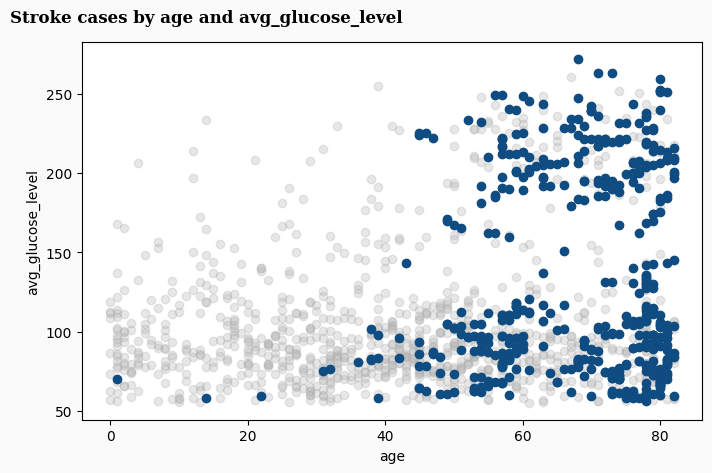

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**2.3.2 SMOTE technique checking when deleting the missing column**<br> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Delete column </p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Applying SMOTE technique </p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Train test split</p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Backtesting with 10 fold cross validation </p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Mean and standard deviation of the folds missing rate performance 

# 1. delete col
x_labels = list()
mean_accuracy_cv = list()
std_accuracy_cv = list()


def imputing_techniques_smote_cross_val(X, y, plot):
    over = SMOTE(sampling_strategy=0.1, random_state=1234)
    under = RandomUnderSampler(sampling_strategy=0.5, random_state=1234)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    # transform the dataset
    X, y = pipeline.fit_resample(X, y)

    if plot:
        # summarize the new class distribution
        counter = Counter(y)
        print(f"Observation in dataset {round(counter[1] / sum(counter.values()) * 100, 2)}%")
        # scatter plot of examples by age vs avg_glucose_level
        fig = plt.figure(figsize=(8, 5), dpi=100, facecolor="#fafafa")
        ax = plt.subplot(111)
        colors = ["#B1B1B1", "#0f4c81"]
        alpha = [0.3, 1]
        for label, _ in counter.items():
            row_ix = np.where(y == label)[0]
            ax.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 3], label=str(label), c=colors[label], alpha=alpha[label])

        ax.set_ylabel('avg_glucose_level')
        ax.set_xlabel("age")

        fig.text(0.035, 0.92, f'Stroke cases by age and avg_glucose_level', fontfamily='serif', fontsize=12,
                 fontweight='bold')
        plt.show()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

    pipe = Pipeline(steps=[("scale", scaling), ('model', model)])
    impute_scores = 1 - cross_val_score(
        pipe, X_train, y_train, scoring="recall_weighted", cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    )
    return impute_scores.mean(), impute_scores.std()


data_cleaned_modeling = data_cleaned.copy().dropna(axis=1)

X = data_cleaned_modeling.drop("stroke", axis=1)
y = data_cleaned_modeling["stroke"]

result = imputing_techniques_smote_cross_val(X, y, plot=True)
x_labels.append("Delete column")
mean_accuracy_cv.append(result[0])
std_accuracy_cv.append(result[1])

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This imbalanced dataset has been corrected with SMOTE (Synthetic Minority Over-sampling Technique) by first oversampling the &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;minority class, then undersampling the majority class.<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In more detail, a random example has been selected from the minority class and then KNN  finds its neighbours, where a randomly &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;space. This approach created a more balanced ditribution. With this technique, this dataset can be modeled here for measuring imputing &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;techniques performance.

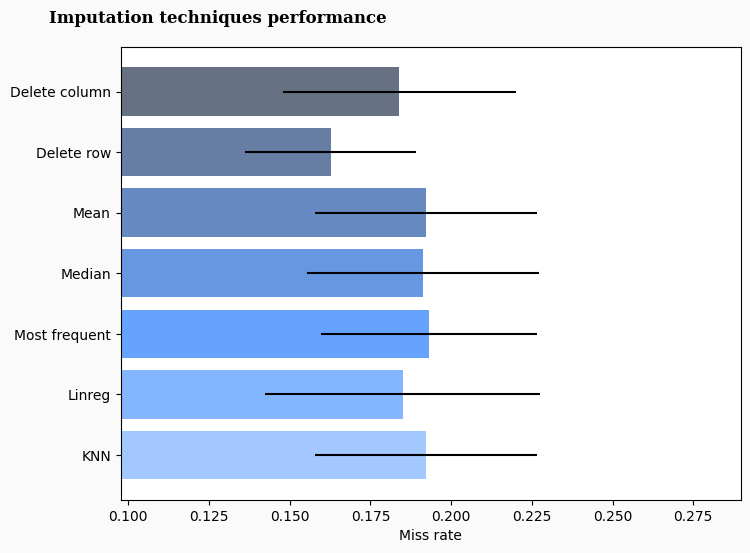

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**2.3.3 Performing imputing techniques**<br> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Delete rows </p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Imputing with mean </p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Imputing with median</p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Imputing with most frequent </p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Imputing with Linear regression </p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Imputing with KNN

# 2. deleting rows filled with NA
data_cleaned_modeling = data_cleaned.copy().dropna(axis=0)
data_cleaned_modeling.isnull().sum()

X = data_cleaned_modeling.drop("stroke", axis=1)
y = data_cleaned_modeling["stroke"]

result = imputing_techniques_smote_cross_val(X=X, y=y, plot=False)
x_labels.append("Delete row")
mean_accuracy_cv.append(result[0])
std_accuracy_cv.append(result[1])

# 3. mean
data_cleaned_modeling = data_cleaned.copy()

X = data_cleaned_modeling.drop("stroke", axis=1)
y = data_cleaned_modeling["stroke"]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X["bmi"] = imp_mean.fit_transform(X["bmi"].to_numpy().reshape(-1, 1))

result = imputing_techniques_smote_cross_val(X=X, y=y, plot=False)
x_labels.append("Mean")
mean_accuracy_cv.append(result[0])
std_accuracy_cv.append(result[1])

# 3. median
data_cleaned_modeling = data_cleaned.copy()

X = data_cleaned_modeling.drop("stroke", axis=1)
y = data_cleaned_modeling["stroke"]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
X["bmi"] = imp_mean.fit_transform(X["bmi"].to_numpy().reshape(-1, 1))

result = imputing_techniques_smote_cross_val(X=X, y=y, plot=False)
x_labels.append("Median")
mean_accuracy_cv.append(result[0])
std_accuracy_cv.append(result[1])

# 4. most_frequent
data_cleaned_modeling = data_cleaned.copy()

X = data_cleaned_modeling.drop("stroke", axis=1)
y = data_cleaned_modeling["stroke"]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X["bmi"] = imp_mean.fit_transform(X["bmi"].to_numpy().reshape(-1, 1))

result = imputing_techniques_smote_cross_val(X=X, y=y, plot=False)
x_labels.append("Most frequent")
mean_accuracy_cv.append(result[0])
std_accuracy_cv.append(result[1])

# 5. lets do some modeling missing values, with regression
lr = LinearRegression()

data_cleaned_modeling = data_cleaned.copy()

test_bmi = data_cleaned_modeling[data_cleaned['bmi'].isnull() == True]  # all na rows of bmi
train_bmi = data_cleaned_modeling[data_cleaned['bmi'].isnull() == False]

y = train_bmi['bmi']
train_bmi = train_bmi.drop("bmi", axis=1)
std_lr = Pipeline(steps=[("scale", scaling), ('model', lr)])
std_lr.fit(train_bmi, y)
test_bmi = test_bmi.drop("bmi", axis=1)
pred = std_lr.predict(test_bmi)
test_bmi['bmi'] = pred
train_bmi['bmi'] = y
data_cleaned_modeling = pd.concat([train_bmi, test_bmi], axis=0)

X = data_cleaned_modeling.drop("stroke", axis=1)
y = data_cleaned_modeling["stroke"]

result = imputing_techniques_smote_cross_val(X=X, y=y, plot=False)
x_labels.append("Linreg")
mean_accuracy_cv.append(result[0])
std_accuracy_cv.append(result[1])

# 6. knn
data_cleaned_modeling = data_cleaned.copy()

X = data_cleaned_modeling.drop("stroke", axis=1)
y = data_cleaned_modeling["stroke"]

knn = KNNImputer(n_neighbors=3)
X["bmi"] = knn.fit_transform(X["bmi"].to_numpy().reshape(-1, 1))

result = imputing_techniques_smote_cross_val(X=X, y=y, plot=False)

x_labels.append("KNN")
mean_accuracy_cv.append(result[0])
std_accuracy_cv.append(result[1])

# aggregate results
n_bars = len(mean_accuracy_cv)
xval = np.arange(n_bars)

colors = ["#001433", "#002966", "#003d99", "#0052cc", "#0066ff", "#3385ff", "#66a3ff"]

# plot diabetes results
fig = plt.figure(figsize=(8, 6), dpi=100, facecolor="#fafafa")
ax = plt.subplot(111)
for j in xval:
    ax.barh(
        j,
        mean_accuracy_cv[j],
        xerr=std_accuracy_cv[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax.set_xlim(left=np.min(mean_accuracy_cv) * 0.6, right=np.max(mean_accuracy_cv) * 1.5)
ax.set_yticks(xval)
ax.set_xlabel("Miss rate")
ax.invert_yaxis()
ax.set_yticklabels(x_labels)
fig.text(0.035, 0.92, "Imputation techniques performance", fontfamily='serif', fontsize=12, fontweight='bold')

plt.show()

# cant choose delete rows, because 40 stroke cases would have been dropped, linreg high var as expected,
# median convincing

dataset.loc[dataset["bmi"].isnull(), "stroke"].sum()

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
dataset["bmi"] = imp_mean.fit_transform(dataset["bmi"].to_numpy().reshape(-1, 1))

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Different imputing techniques have been tried out. After one of them has been applied on column bmi, then 10 fold cross validation with &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;logistic regression has been used to measure its future performance.<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Cross validation metric is the false negative rate or miss rate, calculated with 1 - recall, since the object is to have a method, where actual &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;positive cases missclassified as no stroke by the model is minimized.<br><br>
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Result of the techniques:**
* Deleting column, is never a good approach, reasonal information could have been lost.
* Deleting the row performed the best, with lowest miss rate and std, but it also looses observation stroke cases, which is crucial to include them. 
* Mean, median, and most frequent did performed well, all of them being close to each other.
* Linear regression has performed really well, but as it is seen on the plot, it has relatively high std compared to the other techniques, which makes it unstable.
* KNN also performed well.

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**I have select the median, as it is provided a robust result, also mean can be distorted due to the distribution. Also median is more &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; reliable then most frequent for the same reason. Imputing with models are tends to overfit.**

# **3.0 Explanatory data analysis**

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**3.1 Target variable**

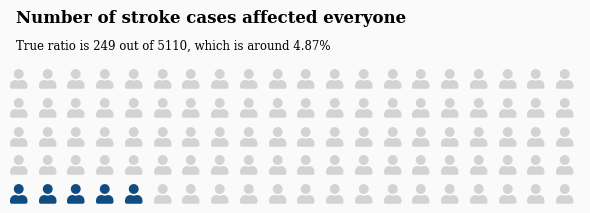

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**3.1.1 Overall stroke cases**<br>


dataset.isnull().sum()
dataset.stroke.sum() / np.shape(dataset)[0] # 0.048, which is

fig = plt.figure(figsize=(6, 3),dpi=100,facecolor="#fafafa",
    FigureClass=Waffle,
    rows=5,
    values=[5, 95],
    colors=['#0f4c81', "lightgray"],
    icons='caravan',
    icon_size='x-large',
    font_size=20,vertical=True,
)

fig.text(0.035,0.86,'Number of stroke cases affected everyone', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.035,0.77,'True ratio is 249 out of 5110, which is around 4.87%', fontfamily='serif', fontsize=8.5)

plt.show()

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Around 4.87% stroke cases included in the dataset.

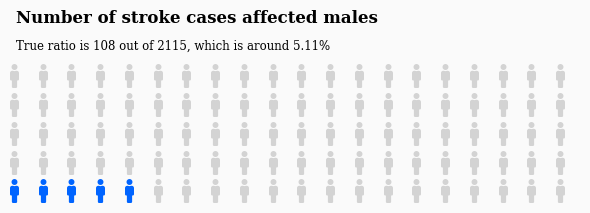

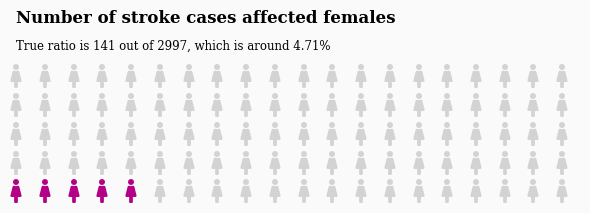

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**3.1.2 Target variable analysis - by gender**<br>
# lets analyse the number of strokes by gender
data_male = dataset[dataset.gender == "Male"].reset_index()
data_male.stroke.sum() / np.shape(data_male)[0] # 0.051, which is

fig = plt.figure(figsize=(6, 3),dpi=100,facecolor="#fafafa",
    FigureClass=Waffle,
    rows=5,
    values=[5, 95],
    colors=['#0064FF', "lightgray"],
    icons='male',
    icon_size='xx-large',
    font_size=20,vertical=True,
)

fig.text(0.035,0.86,'Number of stroke cases affected males', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.035,0.77,'True ratio is 108 out of 2115, which is around 5.11%', fontfamily='serif', fontsize=8.5)

plt.show()



data_female = dataset[dataset.gender == "Female"].reset_index()
data_female.stroke.sum() / np.shape(data_female)[0] # 0.047, which is

fig = plt.figure(figsize=(6, 3),dpi=100,facecolor="#fafafa",
    FigureClass=Waffle,
    rows=5,
    values=[5, 95],
    colors=['#b30086', "lightgray"],
    icons='female',
    icon_size='xx-large',
    font_size=20,vertical=True,
)

fig.text(0.035,0.86,'Number of stroke cases affected females', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.035,0.77,'True ratio is 141 out of 2997, which is around 4.71%', fontfamily='serif', fontsize=8.5)

plt.show()

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Stroke cases does not occure more often if the dataset is splitted by gender. Stroke effects both of them almost equally.

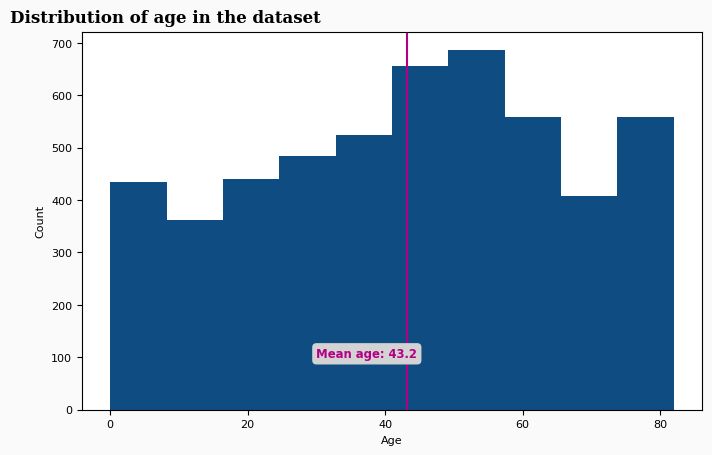

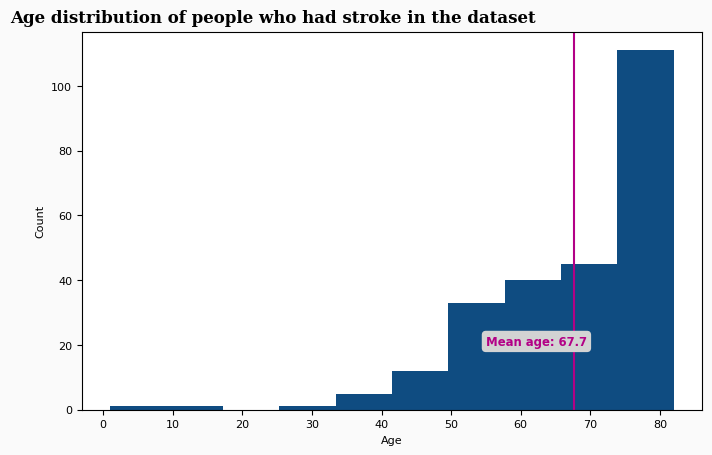

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.2 Age distribution, and those people, who suffered stroke.**
# average value, when people got stroke
fig = plt.figure(figsize=(8, 5),dpi=100, facecolor="#fafafa")
ax = plt.subplot(111)
ax.hist(x=dataset["age"], alpha=1, color="#0f4c81")
ax.axvline(dataset["age"].mean(), color="#b30086")
ax.text(30, 100, "Mean age: " + str(round(dataset["age"].mean(), 1)), color="#b30086", weight="heavy", size="smaller", bbox=dict(boxstyle="round", color="lightgrey"))
ax.set_xlabel("Age", fontsize=8)
ax.set_ylabel("Count", fontsize=8)
fig.text(0.035,0.90,'Distribution of age in the dataset', fontfamily='serif', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()



fig = plt.figure(figsize=(8, 5),dpi=100, facecolor="#fafafa")
ax = plt.subplot(111)
ax.hist(x=dataset[dataset["stroke"]==1]["age"], alpha=1, color="#0f4c81")
ax.axvline(dataset[dataset["stroke"]==1]["age"].mean(), color="#b30086")
ax.text(55, 20, "Mean age: " + str(round(dataset[dataset["stroke"]==1]["age"].mean(), 1)), color="#b30086", weight="heavy", size="smaller", bbox=dict(boxstyle="round", color="lightgrey"))
ax.set_xlabel("Age", fontsize=8)
ax.set_ylabel("Count", fontsize=8)
fig.text(0.035,0.90,'Age distribution of people who had stroke in the dataset', fontfamily='serif', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It can be seen, that people in the dataset are close to the uniform distribution by age.<br>
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Those people with stroke record, are affected after the age of around 40. The average age of having a stroke is 68.

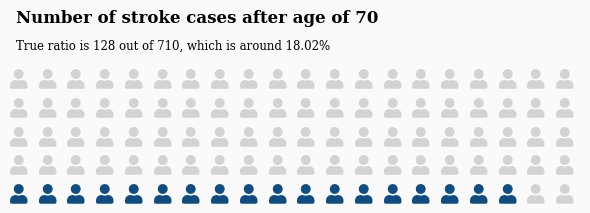

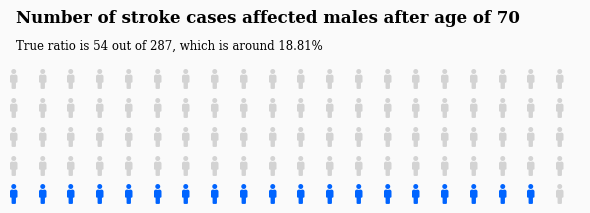

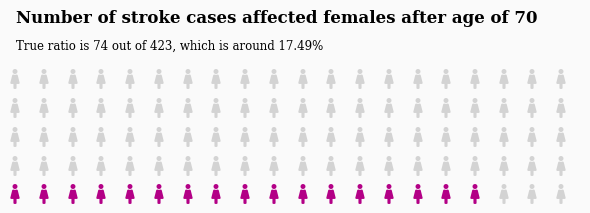

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.3 Analyzing the distribution of people older than 70.**

# older than 70
dataset[dataset["age"] > 70].stroke.sum() / np.shape(dataset[dataset["age"] > 70])[0] 

fig = plt.figure(figsize=(6, 3),dpi=100,facecolor="#fafafa",
    FigureClass=Waffle,
    rows=5,
    values=[18, 82],
    colors=['#0f4c81', "lightgray"],
    icons='user',
    icon_size='x-large',
    font_size=20,vertical=True,
)

fig.text(0.035,0.86,'Number of stroke cases after age of 70', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.035,0.77,'True ratio is 128 out of 710, which is around 18.02%', fontfamily='serif', fontsize=8.5)

plt.show()

dataset[(dataset["age"] > 70) & (dataset["gender"] == "Male")].stroke.sum() / np.shape(dataset[(dataset["age"] > 70) & (dataset["gender"] == "Male")])[0] 

fig = plt.figure(figsize=(6, 3),dpi=100,facecolor="#fafafa",
    FigureClass=Waffle,
    rows=5,
    values=[19, 81],
    colors=['#0064FF', "lightgray"],
    icons='male',
    icon_size='x-large',
    font_size=20,vertical=True,
)

fig.text(0.035,0.86,'Number of stroke cases affected males after age of 70', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.035,0.77,'True ratio is 54 out of 287, which is around 18.81%', fontfamily='serif', fontsize=8.5)

plt.show()

dataset[(dataset["age"] > 70) & (dataset["gender"] == "Female")].stroke.sum() / np.shape(dataset[(dataset["age"] > 70) & (dataset["gender"] == "Female")])[0] 

fig = plt.figure(figsize=(6, 3),dpi=100,facecolor="#fafafa",
    FigureClass=Waffle,
    rows=5,
    values=[17, 83],
    colors=['#b30086', "lightgray"],
    icons='female',
    icon_size='x-large',
    font_size=20,vertical=True,
)

fig.text(0.035,0.86,'Number of stroke cases affected females after age of 70', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.035,0.77,'True ratio is 74 out of 423, which is around 17.49%', fontfamily='serif', fontsize=8.5)

plt.show()

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Plot shows that after the age of 70 the number of stroke cases has increased significantly. Observation are enriched to 18%.

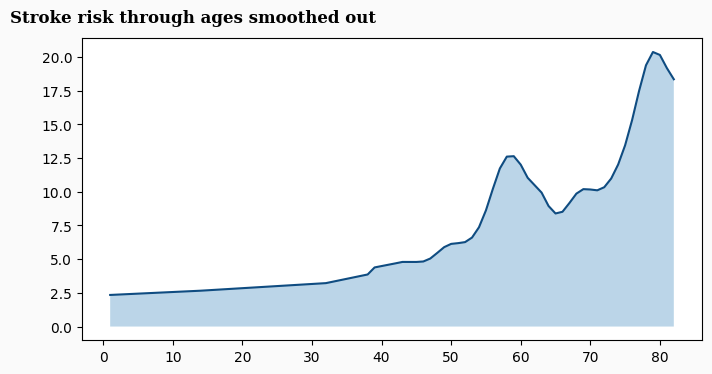

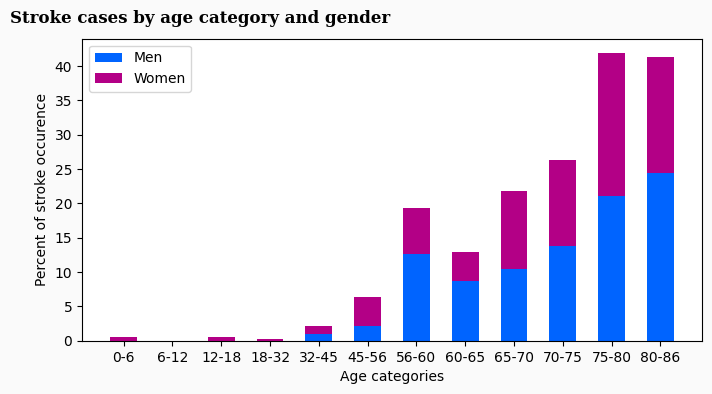

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.4 Stroke cases through age (smoothed out).**

# lets check by age
dataset_stroke_by_age = dataset[["age", "gender", "stroke"]].sort_values("age")

age_stroke = dataset_stroke_by_age[dataset_stroke_by_age["stroke"] == 1].groupby("age").agg({"stroke": np.sum}).reset_index()
all_age = dataset_stroke_by_age.groupby("age").count()

age_stroke["stroke"] /= round(0.01*all_age["stroke"],2)


age_stroke["smoothed"] = gaussian_filter1d(age_stroke["stroke"], sigma=2)

fig = plt.figure(figsize=(8, 4),dpi=100, facecolor="#fafafa")
ax = fig.add_subplot(111)
ax.plot(age_stroke["age"], age_stroke["smoothed"], c="#0f4c81")
fig.text(0.035,0.92,'Stroke risk through ages smoothed out', fontfamily='serif', fontsize=12, fontweight='bold')
ax.fill_between(age_stroke["age"], age_stroke["smoothed"],alpha=0.30)
plt.show()

dataset_stroke_by_age["age_cut"] = pd.cut(dataset_stroke_by_age["age"],
                                          bins=[-1, 6, 12, 18, 32, 45, 56, 60, 65, 70, 75, 80, 86],
                                          labels=["0-6", "6-12", "12-18", "18-32", "32-45",
                                                  "45-56", "56-60", "60-65","65-70", "70-75", "75-80", "80-86"])

male_stroke_by_age = dataset_stroke_by_age[dataset_stroke_by_age["gender"] == "Male"].groupby("age_cut").agg({"stroke": np.sum})
data_male["age_cut"] = pd.cut(data_male["age"],
                                          bins=[-1, 6, 12, 18, 32, 45, 56, 60, 65, 70, 75, 80, 86],
                                          labels=["0-6", "6-12", "12-18", "18-32", "32-45",
                                                  "45-56", "56-60", "60-65","65-70", "70-75", "75-80", "80-86"])

male_stroke_by_age["stroke"] = round(male_stroke_by_age["stroke"] / data_male.groupby('age_cut').count()["index"] * 100, 2)

female_stroke_by_age = dataset_stroke_by_age[dataset_stroke_by_age["gender"] == "Female"].groupby("age_cut").agg({"stroke": np.sum})
data_female["age_cut"] = pd.cut(data_female["age"],
                                          bins=[-1, 6, 12, 18, 32, 45, 56, 60, 65, 70, 75, 80, 86],
                                          labels=["0-6", "6-12", "12-18", "18-32", "32-45",
                                                  "45-56", "56-60", "60-65","65-70", "70-75", "75-80", "80-86"])

female_stroke_by_age["stroke"] = round(female_stroke_by_age["stroke"] / data_female.groupby('age_cut').count()["index"] * 100, 2)
ind = ["0-6", "6-12", "12-18", "18-32", "32-45",
       "45-56", "56-60", "60-65","65-70", "70-75", "75-80", "80-86"]

width = 0.55       # the width of the bars: can also be len(x) sequence
fig = plt.figure(figsize=(8, 4),dpi=100, facecolor="#fafafa")

p1 = plt.bar(ind, male_stroke_by_age["stroke"], width,color="#0064FF")
p2 = plt.bar(ind, female_stroke_by_age["stroke"], width, color="#b30086",   bottom=male_stroke_by_age["stroke"])

plt.ylabel('Percent of stroke occurence')
plt.xlabel('Age categories')

fig.text(0.035,0.92,'Stroke cases by age category and gender', fontfamily='serif', fontsize=12, fontweight='bold')

plt.xticks(ind)

plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()
# clearly age has an effect!

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Plots show that as we get older, the risk of having stroke increases, and there is not much difference in each age bins if we look at the &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;gender sets. In the age of 56-65 men are slightly more affected.

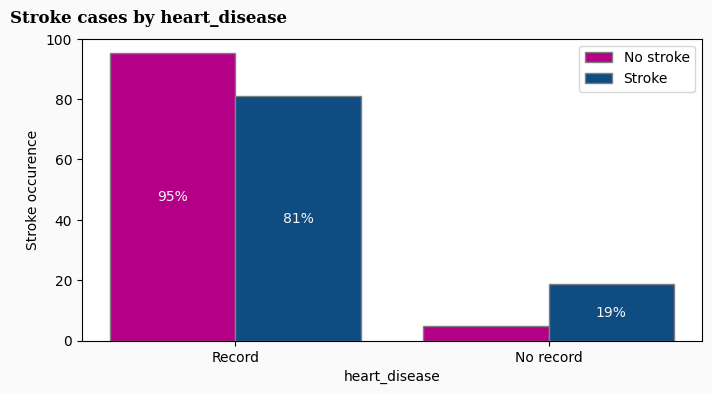

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.5 Stroke cases by hearth disease.**

def category_by_stroke(data, category, ind=None):
    dataset_stroke_by = data[[category, "stroke"]]

    no_stroke = dataset_stroke_by[dataset_stroke_by["stroke"] == 0].groupby(category).count().reset_index()
    no_stroke["stroke"] = round(100*no_stroke["stroke"] / np.shape(dataset_stroke_by[dataset_stroke_by["stroke"] == 0])[0], 2)
    stroke = dataset_stroke_by[dataset_stroke_by["stroke"] == 1].groupby(category).count().reset_index()
    stroke["stroke"] = round(100*stroke["stroke"] / np.shape(dataset_stroke_by[dataset_stroke_by["stroke"] == 1])[0], 2)

    if ind is None:
        ind = no_stroke[category]
    X_axis = np.arange(len(ind))

    width = 0.40       # the width of the bars: can also be len(x) sequence
    fig = plt.figure(figsize=(8, 4),dpi=100, facecolor="#fafafa")

    ax = plt.subplot(111)
    color_nostroke = ["#b30086"]
    color_stroke = ["#0f4c81"]

    ax.bar(X_axis-0.2, no_stroke["stroke"], width,color=color_nostroke, align='center',edgecolor='grey')
    ax.bar(X_axis+0.2, stroke["stroke"], width, color=color_stroke, align='center',edgecolor='grey')

    plt.ylabel('Stroke occurence')
    plt.xlabel(category)

    fig.text(0.035,0.92,f'Stroke cases by {category}', fontfamily='serif', fontsize=12, fontweight='bold')

    plt.xticks(X_axis, ind)

    for i in range(np.shape(no_stroke)[0]):
        if no_stroke["stroke"][i] > 8:
            ax.annotate(f'{no_stroke["stroke"][i]:0.0f}%',xy=(i-0.2, no_stroke["stroke"][i]/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
        if stroke["stroke"][i] > 8:
            ax.annotate(f'{stroke["stroke"][i]:0.0f}%',xy=(i+0.2, stroke["stroke"][i]/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    plt.legend(["No stroke","Stroke"])
    plt.show()
    
# lets analyse hypertension on stroke
category_by_stroke(dataset, "heart_disease", ind=["Record", "No record"])


##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Both record and no record categories are very similiar. No heart disesea record could mean a little bit higher risk of having a stroke. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;However if the patient has stroke, than it is highly likely that he or she has record of heart disease.

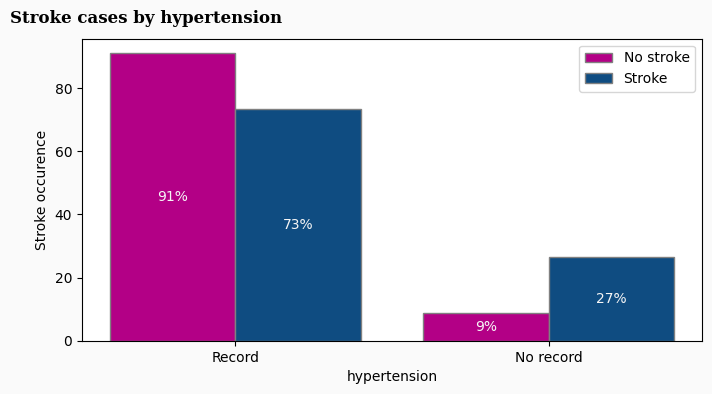

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.6 Stroke cases by hypertension.**

# lets analyse hypertension on stroke
category_by_stroke(dataset, "hypertension", ind=["Record", "No record"])

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Having no medical record of hypertension has a higher change of having a stroke, according to the plot. If the patient has stroke, than he &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;or she has higher chance of having a record of hypertension as well.

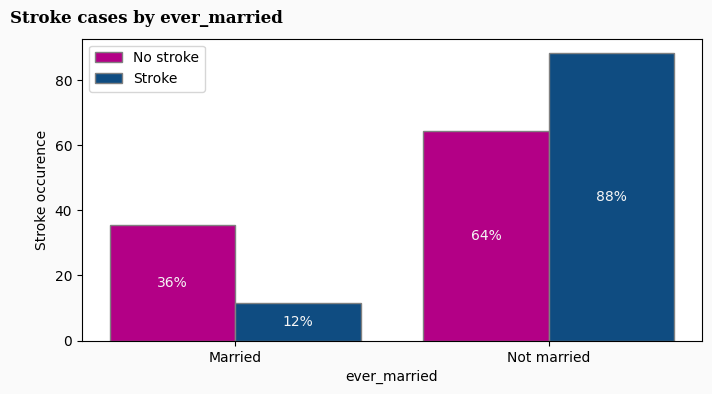

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.6 Stroke cases by ever married.**

# marriage on stroke
category_by_stroke(dataset, "ever_married", ind=["Married", "Not married"])

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This variable has no direct causality with having a stroke from medical perspective, but it is interesting to investigate. This plot shows,  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;that not married people are more affected by stroke, than those people who are married.

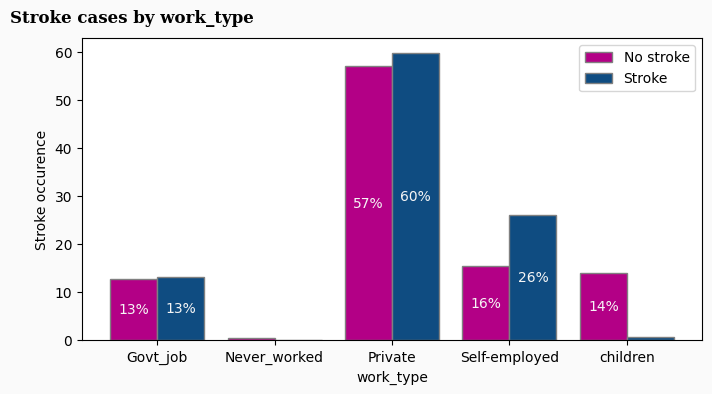

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.7 Stroke cases by work type.**

# work type on stroke
category_by_stroke(dataset, "work_type")

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Work type categories shows that self employed status is the one, which has worst chance of having a stroke or not. However people &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;working in the private sector suffers the most of having a stroke out of all work types.

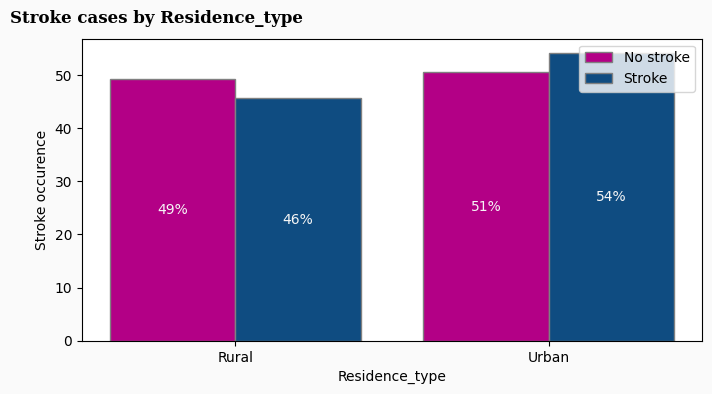

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.8 Stroke cases by residence type.**

# residence type on stroke
category_by_stroke(dataset, "Residence_type")

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Residence shows similar distribution in both cases.

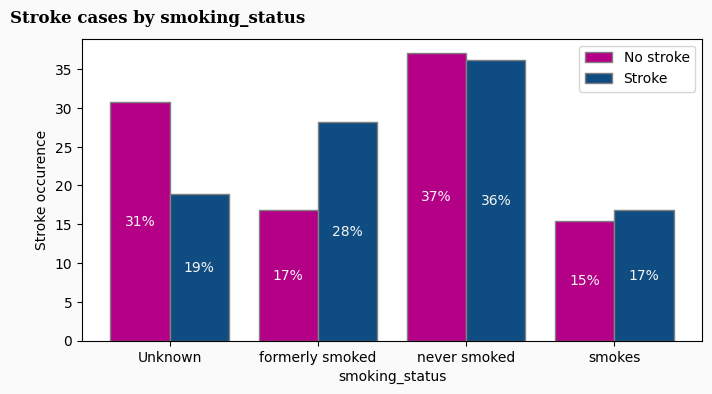

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.9 Stroke cases by smoking status.**

# smoking status on stroke
category_by_stroke(dataset, "smoking_status")

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Smoking status shows some controversial information. The carbon monoxide reduces the amount of oxygen in your blood, and the &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;nicotine makes your heart beat faster and raises your blood pressure. This increases your risk of a stroke. Smoking can also trigger an &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;episode of atrial fibrillation, a heart condition that is a risk factor for stroke. However, those people who never smoked, have the higher &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;chance of getting a stroke according to the dataset. But formely smoked and smokes categories merged together, produces higher rate &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;than never smoked category.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


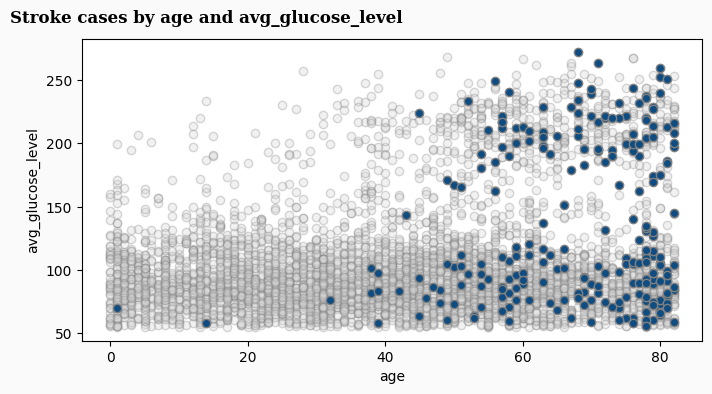

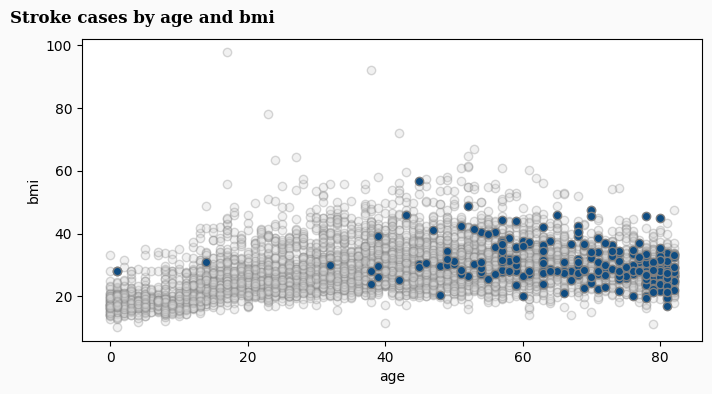

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.10 Glucose level**

# lets check the glucose level
dataset_stroke_by_age_glucose = dataset[["age", "avg_glucose_level","bmi", "stroke"]]
dataset_stroke_by_age_glucose["age_cut"] = pd.cut(dataset_stroke_by_age["age"],
                                          bins=[-1, 6, 12, 18, 32, 45, 56, 60, 65, 70, 75, 80, 86],
                                          labels=["0-6", "6-12", "12-18", "18-32", "32-45",
                                                  "45-56", "56-60", "60-65","65-70", "70-75", "75-80", "80-86"])

stroke_by_age_glucose = dataset_stroke_by_age_glucose[dataset_stroke_by_age_glucose["stroke"] == 1]
nonstroke_by_age_glucose = dataset_stroke_by_age_glucose[dataset_stroke_by_age_glucose["stroke"] == 0]

fig = plt.figure(figsize=(8, 4), dpi=100, facecolor="#fafafa")

ax = plt.subplot(111)
ax.scatter(y=nonstroke_by_age_glucose["avg_glucose_level"], x=nonstroke_by_age_glucose["age"], c="lightgrey", alpha=0.3,edgecolors="grey")
ax.scatter(y=stroke_by_age_glucose["avg_glucose_level"], x=stroke_by_age_glucose["age"], c="#0f4c81",edgecolors="grey")
fig.text(0.035, 0.92, f'Stroke cases by age and avg_glucose_level', fontfamily='serif', fontsize=12, fontweight='bold')

plt.ylabel('avg_glucose_level')
plt.xlabel("age")

plt.show()
plt.close()


fig = plt.figure(figsize=(8, 4), dpi=100, facecolor="#fafafa")

ax = plt.subplot(111)
ax.scatter(y=nonstroke_by_age_glucose["bmi"], x=nonstroke_by_age_glucose["age"], c="lightgrey", alpha=0.3,edgecolors="grey")
ax.scatter(y=stroke_by_age_glucose["bmi"], x=stroke_by_age_glucose["age"], c="#0f4c81",edgecolors="grey")
fig.text(0.035, 0.92, f'Stroke cases by age and bmi', fontfamily='serif', fontsize=12, fontweight='bold')
plt.ylabel('bmi')
plt.xlabel("age")
plt.show()
plt.close()


##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Average glucose level by age shows that as people getting older, their glucose level rises up. This process does not affect everyone, but &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;those people, who have suffered stroke definitely.<br>
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;BMI index has a stable variance through all ages.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


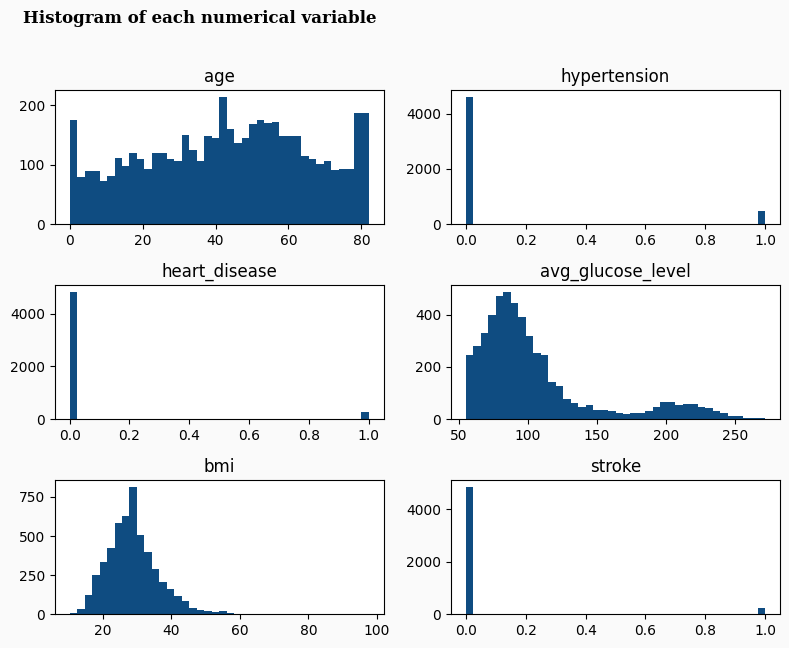

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.11 Histogram of each numerical variable**

# histogram of numerical variables
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor="#fafafa")
dataset.hist(bins=40, ax=ax, color="#0f4c81", grid=False)
fig.text(0.035, 1.05, f'Histogram of each numerical variable', fontfamily='serif', fontsize=12, fontweight='bold')
fig.tight_layout()
plt.show()


##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Hypertension and heart disease occurs rarely in the dataset. The majority of people are married, but this plot does include childre, so it is &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a little bit distorted. Average glucose shows that there are a few people with really high glucose level and there is a small gap around &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;175. BMI index has a normal ditribution.

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.12 Describe data**

# describe data
descriptive_stat = dataset.describe(include="all").round(2)
cell_hover = { 
    'selector': 'td:hover',
    'props': [('background-color', 'lightblue'), ('font-style', 'serif')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: serif; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #0f4c81; color: white;font-style: serif;'
}
descriptive_stat.style.set_table_styles([cell_hover, index_names, headers])
descriptive_stat

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,5110.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.22,0.1,0.05,NaN,NaN,NaN,106.15,28.86,NaN,0.05
std,NaN,22.63,0.3,0.23,NaN,NaN,NaN,45.28,7.70,NaN,0.22
min,NaN,0.00,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.80,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,32.80,NaN,0.00


In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.13 Avegrage value of each numeric variable when stroke either occured or not**

average_distribution = dataset.groupby("stroke")[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].mean()

cell_hover = { 
    'selector': 'td:hover',
    'props': [('background-color', 'lightblue'), ('font-style', 'serif')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: serif; color: white; background-color: #0f4c81; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #0f4c81; color: white;font-style: serif;'
}
average_distribution.style.set_table_styles([cell_hover, index_names, headers])
average_distribution

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.959679,0.088871,0.047110,104.795513,28.799115
1,67.726908,0.265060,0.188755,132.544739,30.090361


## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **3.14 Outlier detection using boxplots**

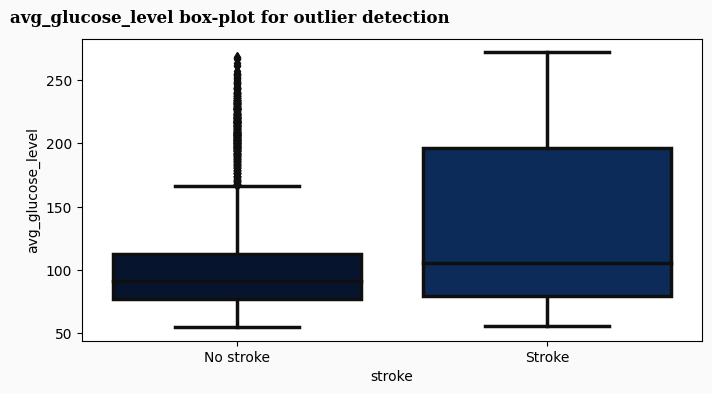

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**3.14.1 Box plots for checking outliers on average glucose level**

# outlier detection for continous variables
fig, ax = plt.subplots(figsize=(8, 4), dpi=100, facecolor="#fafafa")
sb.boxplot(x="stroke", y="avg_glucose_level", data=dataset,linewidth=2.5, palette=colors)
ax.set_xticklabels(["No stroke", "Stroke"])
fig.text(0.035, 0.92, f'{"avg_glucose_level"} box-plot for outlier detection', fontfamily='serif', fontsize=12, fontweight='bold')
plt.show()

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are outliers in this variable, as it can be seen in case of stroke. Maximum values are way further than the third quartile. It &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;must be handled during the feature engineering phase.

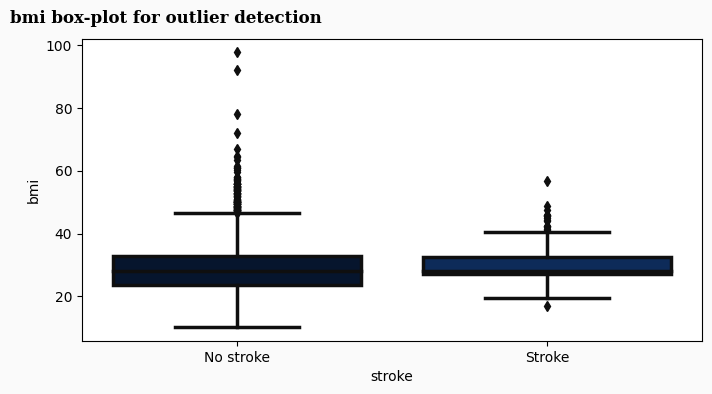

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**3.14.2 Box plots for checking outliers on bmi**
# outlier detection for continous variables
fig, ax = plt.subplots(figsize=(8, 4), dpi=100, facecolor="#fafafa")
sb.boxplot(x="stroke", y="bmi", data=dataset,linewidth=2.5, palette=colors)
ax.set_xticklabels(["No stroke", "Stroke"])
fig.text(0.035, 0.92, f'{"bmi"} box-plot for outlier detection', fontfamily='serif', fontsize=12, fontweight='bold')
plt.show()

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;BMI has also outliers in both cases. Maximum values are way further than the third quartile. It must be handled during the &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;feature engineering phase.

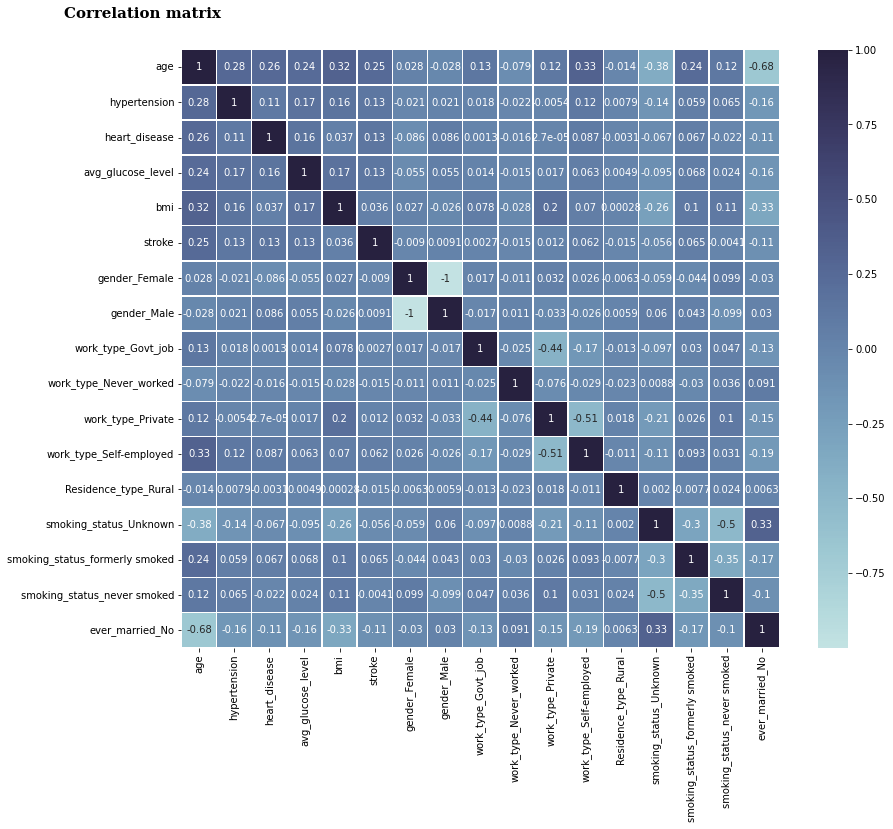

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**3.15 Correlation matrix**

# Compute the correlation matrix, where category variables transformed to dummies.
dataset = create_dummies(dataset.copy(), "gender")
dataset = create_dummies(dataset, "work_type")
dataset = create_dummies(dataset, "Residence_type")
dataset = create_dummies(dataset, "smoking_status")
dataset = create_dummies(dataset, "ever_married")

corr = dataset.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 11))

# Generate a custom diverging colormap
cmap = sb.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5,annot=True)


f.text(0.035, 0.92, f'Correlation matrix', fontfamily='serif', fontsize=15, fontweight='bold')
plt.show()
plt.close()

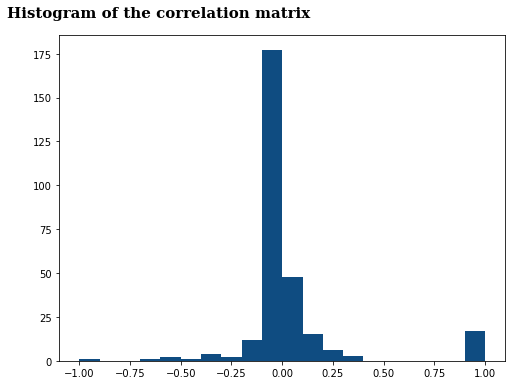

In [ ]:
#@title ## &nbsp;&nbsp;&nbsp;&nbsp;**Correlation matrix histogram**
# Histogram of correlation
corr = np.tril(data_cleaned.corr()).ravel()
f, ax = plt.subplots(figsize=(8, 6))
f.text(0.035, 0.92, f'Histogram of the correlation matrix', fontfamily='serif', fontsize=15, fontweight='bold')
plt.hist(corr, bins=20, color="#0f4c81")
plt.show()

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Histogram shows the frequency of correlation coefficients among all feature pairs. It shows that the majority of features is only weakly &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;correlated. <br><br>
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;However correlation can be observed in a few cases:
* Gender Female and Gender Male dummies, are inverse of each other, and there is only 1 row, where data has a record of "Other gender", which was left out from the dataset. Since we dont want to add duplicated information in our modelset, one of the dummy variable of gender will be removed.
* Worky type dummies suffer from moderate correlation, just like smoking status.
* Age and evermarried have negative correlation, in case of No dummy, which is plausible.

## &nbsp;&nbsp;&nbsp;&nbsp;**3.16 Determining the most important features**


---------- Model: RandomForestClassifier()
---- Applied scoring method: recall_weighted  (std deviation)
>1 0.086 (0.009)
>2 0.056 (0.011)
>3 0.053 (0.010)
>4 0.053 (0.011)
>5 0.052 (0.010)
>6 0.052 (0.010)


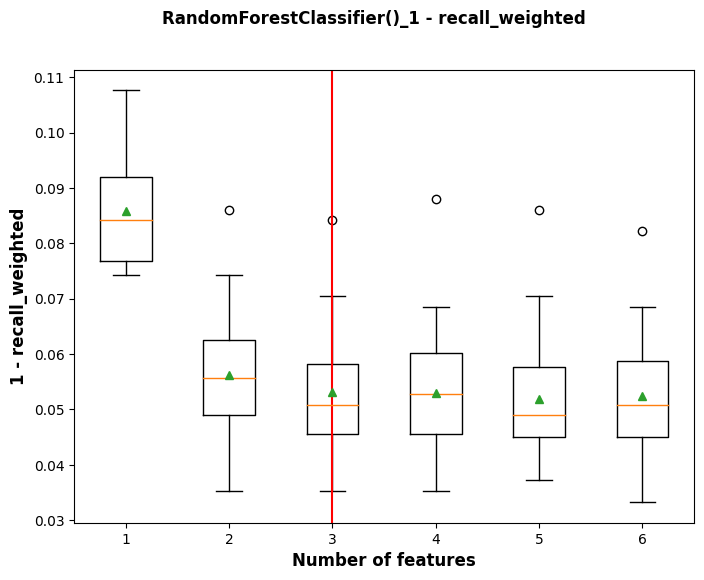

,RandomForestClassifier()
0,age
1,avg_glucose_level
2,bmi


In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**3.16.1 Recursive Feature Elimination with 10 fold cross validation**

def get_models(estimator, num_features_tested):
    models = dict()
    for i in range(1, num_features_tested+1):
        rfe = RFE(estimator=estimator, n_features_to_select=i)
        model = estimator
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models


# evaluate a given model using cross-validation
def evaluate_model(model, X, y, scoring):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = 1 - cross_val_score(model, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    return scores


def recursive_feature_elimination(data, estimators, num_features_tested, scoring, optimum):


    y = data["stroke"]
    X = data.drop("stroke", axis=1)

    # get the models to evaluate
    for model_i in estimators:
        var_selected_by_pos_model = {}

        print("---------- Model: " + str(model_i))
        models = get_models(model_i, num_features_tested=num_features_tested)



        for scoring_i in scoring:
            print("---- Applied scoring method: " + str(scoring_i) + " " + " (std deviation)")

            # evaluate the models and store results
            score_list, results, names = list(), list(), list()

            for name, model in models.items():
                scores = evaluate_model(model, X, y, scoring=scoring_i)
                results.append(scores)
                names.append(name)
                print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
                score_list.append(mean(scores))

            feature_perf = pd.DataFrame({"Performance": score_list})
            feature_perf["lag"] = feature_perf.Performance.shift(1)
            feature_perf["diff"] = round(feature_perf.lag - feature_perf.Performance, 3)
            
            
            feature_perf.iloc[0,:] = [0,0,1]
            num_features_where_diff_1_percent = list(np.where((optimum[0] < abs(feature_perf["diff"])) & (optimum[1] > abs(feature_perf["diff"])), 1, 0))

            
            n_features_to_select = next(x for x in
                                                range(len(num_features_where_diff_1_percent)) if
                                                num_features_where_diff_1_percent[x] == 1)+1


            # plot model performance for comparison
            fig = plt.figure(figsize=(8, 6), dpi=100)
            fig.suptitle(str(model_i) + "_" + "1 - " + str(scoring_i), fontsize=12, fontweight='bold')

            ax = fig.add_subplot(111)
            ax.boxplot(results, labels=names, showmeans=True)
            plt.axvline(x=n_features_to_select, c="r")
            ax.set_xlabel('Number of features', fontsize=12, fontweight='bold')
            ax.set_ylabel("1 - "+str(scoring_i), fontsize=12, fontweight='bold')


            rfe = RFE(estimator=model_i, n_features_to_select=n_features_to_select)
            # fit RFE
            rfe.fit(X, y)
            # summarize all features
            final_vars = []
            for i in range(X.shape[1]):
                if rfe.support_[i] == True:
                    final_vars.append(data.columns[1:][i])
            var_selected_by_pos_model[str(model_i)] = final_vars

            plt.show()

            return(pd.DataFrame(var_selected_by_pos_model))


cols = dataset.columns.tolist()
cols.remove("stroke")
cols.insert(0,"stroke")
dataset = dataset[cols]

result = recursive_feature_elimination(data=dataset,
                                       estimators=[RandomForestClassifier()],
                                       num_features_tested=6,
                                       scoring=["recall_weighted"],
                                       optimum=[0.001, 0.007])

cell_hover = { 
                'selector': 'td:hover',
                'props': [('background-color', 'lightblue'), ('font-style', 'serif')]
}
index_names = {
                'selector': '.index_name',
                'props': 'font-style: serif; color: white; background-color: #0f4c81; font-weight:normal;'
}
headers = {
                'selector': 'th:not(.index_name)',
                 'props': 'background-color: #0f4c81; color: white;font-style: serif;'
}
result.style.set_table_styles([cell_hover, index_names, headers])
result

#####This approach not only select the best features, but also helps to avoid overfitting in the modeling phase!
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this section, I am trying to determine the most important features of the data set. The function uses Recursive Feature Elimination, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;selecting the best 1, then best 2, all the way up to best 6 variables based on metric, and then applying 10 fold cross validation to measure &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;its performance. I am using 1 - recall or missrate, and then aggregate all of the cv results to measure the mean and std of the scores. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Then I analyze the different scoring results by cheking that the mean of the score has decreased. The final number of features is &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;determined by the first case,  where the missrate has decreased from the previous result. In other word, trying to find the first local &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;minimum of the function. This is shown on the plot with boxplots, and the vertical red line marks the best model.<br><br>
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The best variables are <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- age</p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- avg_glucose_level </p> <p>  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- bmi</p>

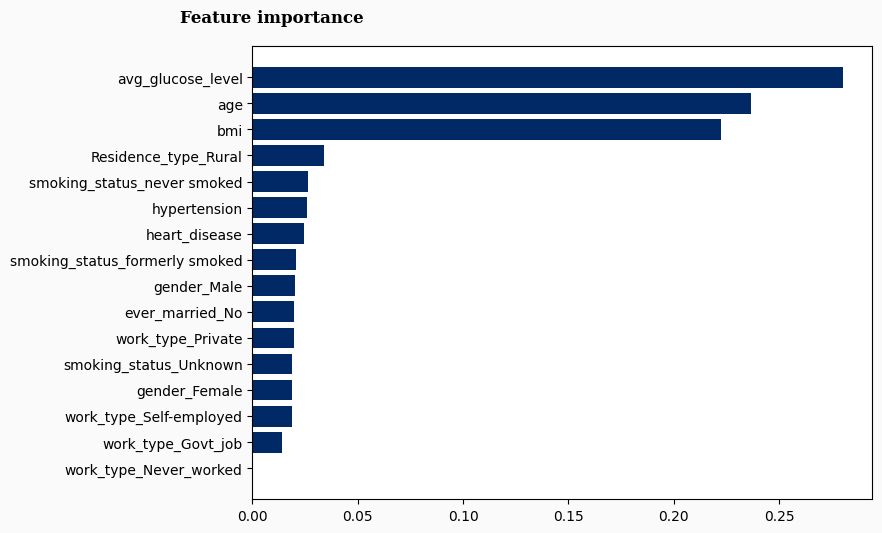

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**3.16.2 Feature importance**
rf = RandomForestClassifier()
rf.fit(dataset.drop("stroke", axis=1), dataset.stroke)
importances = rf.feature_importances_
features = pd.Series(importances, index=dataset.drop("stroke", axis=1).columns).sort_values()

fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor="#fafafa")
ax.barh(width=features, y=features.index, color=colors[1])
fig.text(0.035, 0.92, f'Feature importance', fontfamily='serif', fontsize=12, fontweight='bold')

plt.show()

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Feature importance shows that 3 variables have really high potential effect among all predictors to explain stroke:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The best variables are <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- avg_glucose_level</p> <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- age </p> <p>  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- bmi</p>


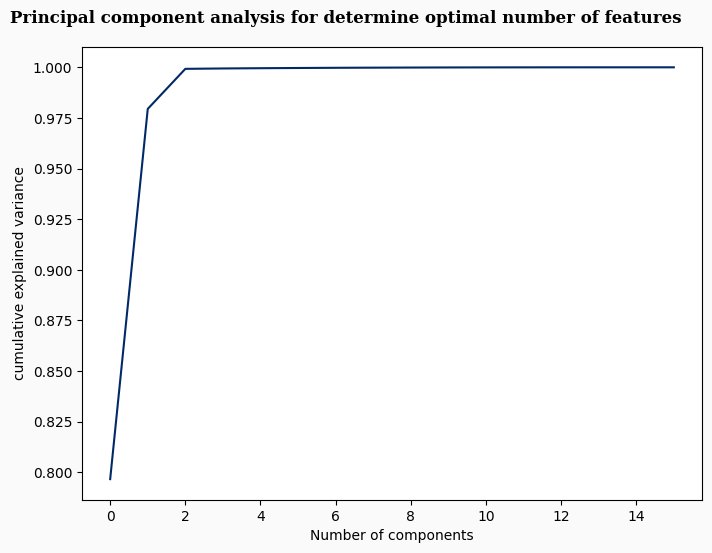

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**3.16.3 Principal component analysis**

pca = PCA().fit(dataset.drop("stroke", axis=1))
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor="#fafafa")

plt.plot(np.cumsum(pca.explained_variance_ratio_),color=colors[1])
fig.text(0.035, 0.92, f'Principal component analysis for determine optimal number of features', fontfamily='serif', fontsize=12, fontweight='bold')

ax.set_xlabel('Number of components')
ax.set_ylabel('cumulative explained variance');

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This unsupervised technique shows, that only 2 component is enough to explain most of the variance in the dataset, which is in &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;connection with the feature_importance result. Although we do not know from the plot, which variables were used, PCA orders the &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;variables by their variance level, starting with the highest first. Therefore age, avg_glucose_level, and bmi created the first 2 component.

# **4.0 Sampling techniques overview**

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**4.1 Train test splitting**

X = dataset.drop("stroke", axis=1)
y = dataset["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


Splitting dataset with 70% train - 30% test. This test sample will be completely unseen by the model, and its only purpose is to validate the models later on.

##**Trying out different, more advanced resampling techniques**
* Support Vector Machine SMOTE technique tries to create new minority class instances near borderlines, where there are less observations, with SVM and therefore it can address the harder minority class prediction problem by helping to draw the separation between the binary classes. It can be expected to perform better than its ancestor.

* Adaptive Synthetic Sampling (ADASYN) is similar like borderline svm smote, it populates the dataset with syntetic examples, where the density of the minority class is low. So it focuses on those observations, which can be harder to learn.
This method can also help to capture a better relation with those few stroke cases.

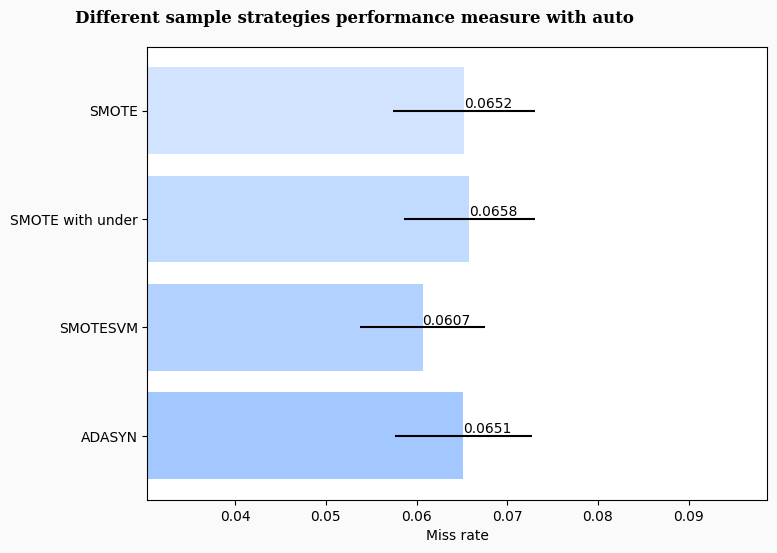

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**4.2 SMOTE, SMOTE with undersampling, SMOTESVM, ADASYN techniques with auto resampling**

def all_resample_techs_cross_val(X, y):

    x_labels = list()
    mean_accuracy_cv = list()
    std_accuracy_cv = list()

    model = RandomForestClassifier()

    over = SMOTE(random_state=1234)
    steps = [('over', over),
             ('model', model)]
    pipeline = Pipeline(steps=steps)

    impute_scores = 1 - cross_val_score(
          pipeline, X, y, scoring="recall_weighted", cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
    )
    mean_accuracy_cv.append(impute_scores.mean())
    std_accuracy_cv.append(impute_scores.std())

    over = SMOTE(random_state=1234)
    under = RandomUnderSampler(random_state=1234)
    steps = [('over', over),
             ('under', under),
             ('model', model)]
    pipeline = Pipeline(steps=steps)

    impute_scores = 1 - cross_val_score(
          pipeline, X, y, scoring="recall_weighted", cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
    )
    mean_accuracy_cv.append(impute_scores.mean())
    std_accuracy_cv.append(impute_scores.std())

    over = SVMSMOTE(random_state=1234)
    steps = [('over', over),
             ('model', model)]
    pipeline = Pipeline(steps=steps)

    impute_scores = 1 - cross_val_score(
          pipeline, X, y, scoring="recall_weighted", cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
    )
    mean_accuracy_cv.append(impute_scores.mean())
    std_accuracy_cv.append(impute_scores.std())

    over = ADASYN(random_state=1234)
    steps = [('over', over),
             ('model', model)]
    pipeline = Pipeline(steps=steps)

    impute_scores = 1 - cross_val_score(
          pipeline, X, y, scoring="recall_weighted", cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
    )
    mean_accuracy_cv.append(impute_scores.mean())
    std_accuracy_cv.append(impute_scores.std())

    return mean_accuracy_cv, std_accuracy_cv

result = all_resample_techs_cross_val(X_train, y_train)

fig = plt.figure(figsize=(8, 6), dpi=100, facecolor="#fafafa")
ax = plt.subplot(111)
n_bars = len(result[0])
xval = np.arange(n_bars)
colors = ["#b3d1ff", "#99c2ff", "#80b3ff", "#66a3ff", "#4d94ff", "#3385ff", "#1a75ff", "#0066ff", "#005ce6",
          "#0052cc", "#0047b3", "#003d99", "#003380", "#002966", "#001f4d", "#001433"]
for j in xval:
    ax.barh(
        j,
        result[0][j],
        xerr=result[1][j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )
    ax.text(result[0][j], j, str(result[0][j].round(4)), color='black', fontsize=10, ha='left', va='bottom')


ax.set_xlim(left=np.min(result[0]) * 0.5, right=np.max(result[0]) * 1.5)
ax.set_yticks(xval)
ax.set_xlabel("Miss rate")
ax.invert_yaxis()
ax.set_yticklabels(["SMOTE","SMOTE with under", "SMOTESVM", "ADASYN"])
fig.text(0.035, 0.92, "Different sample strategies performance measure with auto", fontfamily='serif', fontsize=12, fontweight='bold')

plt.show()






Auto sampling techniques shows that SMOTE technique with SVM performed the best among the different techniques. Lets see, if we can further improve the results.

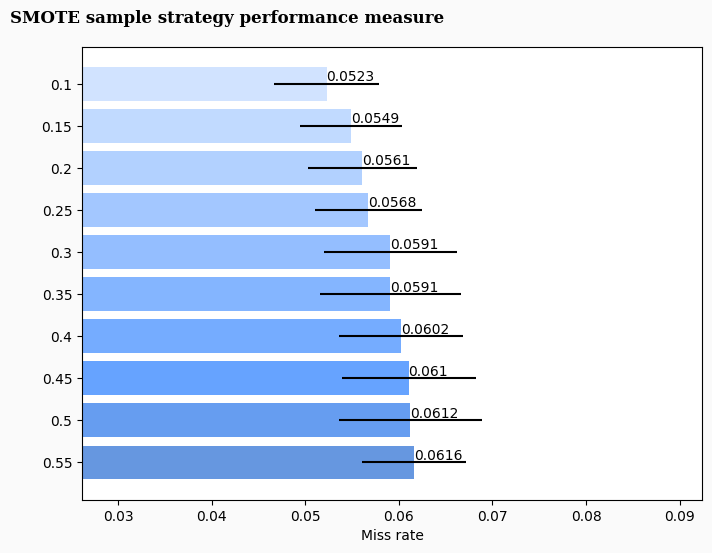

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**4.3 SMOTE technique without undersampling and its cross validation for optimizing sampling strategy**

def smote_cross_val(X, y, values):

    x_labels = list()
    mean_accuracy_cv = list()
    std_accuracy_cv = list()

    model = RandomForestClassifier()

    for i in values:
      over = SMOTE(sampling_strategy=i, random_state=1234)
      steps = [('over', over),
               ('model', model)]
      pipeline = Pipeline(steps=steps)

      impute_scores = 1 - cross_val_score(
          pipeline, X, y, scoring="recall_weighted", cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
      )
      mean_accuracy_cv.append(impute_scores.mean())
      std_accuracy_cv.append(impute_scores.std())

    return mean_accuracy_cv, std_accuracy_cv

smote_strat_values = np.arange(0.1, 0.6, 0.05)
result = smote_cross_val(X_train, y_train, smote_strat_values)

fig = plt.figure(figsize=(8, 6), dpi=100, facecolor="#fafafa")
ax = plt.subplot(111)
n_bars = len(result[0])
xval = np.arange(n_bars)
colors = ["#b3d1ff", "#99c2ff", "#80b3ff", "#66a3ff", "#4d94ff", "#3385ff", "#1a75ff", "#0066ff", "#005ce6",
          "#0052cc", "#0047b3", "#003d99", "#003380", "#002966", "#001f4d", "#001433"]
for j in xval:
    ax.barh(
        j,
        result[0][j],
        xerr=result[1][j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )
    ax.text(result[0][j], j, str(result[0][j].round(4)), color='black', fontsize=10, ha='left', va='bottom')


ax.set_xlim(left=np.min(result[0]) * 0.5, right=np.max(result[0]) * 1.5)
ax.set_yticks(xval)
ax.set_xlabel("Miss rate")
ax.invert_yaxis()
ax.set_yticklabels(smote_strat_values.round(4))
fig.text(0.035, 0.92, "SMOTE sample strategy performance measure", fontfamily='serif', fontsize=12, fontweight='bold')

plt.show()



As we can see from the plot, the less we use SMOTE, the better missrate can be achieved. However this can be missleading, as there are just a few obervations we have in our dataset, and the model wont capture the true relation if the dataset is not balanced enough. Also there is not much difference in term of missrate between using 50% ratio syntetic example or using just 10%.

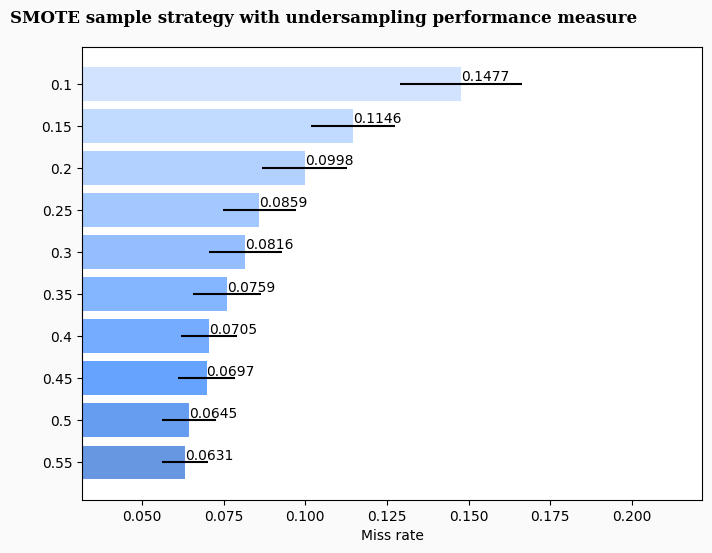

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**4.4 SMOTE technique with undersampling and its cross validation for optimizing sampling strategy**

def smote_undersampling_cross_val(X, y, values):

    x_labels = list()
    mean_accuracy_cv = list()
    std_accuracy_cv = list()

    model = RandomForestClassifier()

    for i in values:
      over = SMOTE(sampling_strategy=i, random_state=1234)
      under = RandomUnderSampler(sampling_strategy=0.6, random_state=1234)
      steps = [('over', over),
               ('under', under),
               ('model', model)]
      pipeline = Pipeline(steps=steps)

      impute_scores = 1 - cross_val_score(
          pipeline, X, y, scoring="recall_weighted", cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
      )
      mean_accuracy_cv.append(impute_scores.mean())
      std_accuracy_cv.append(impute_scores.std())

    return mean_accuracy_cv, std_accuracy_cv

smote_strat_values = np.arange(0.1, 0.6, 0.05)
result = smote_undersampling_cross_val(X_train, y_train, smote_strat_values)

fig = plt.figure(figsize=(8, 6), dpi=100, facecolor="#fafafa")
ax = plt.subplot(111)
n_bars = len(result[0])
xval = np.arange(n_bars)
colors = ["#b3d1ff", "#99c2ff", "#80b3ff", "#66a3ff", "#4d94ff", "#3385ff", "#1a75ff", "#0066ff", "#005ce6",
          "#0052cc", "#0047b3", "#003d99", "#003380", "#002966", "#001f4d", "#001433"]
for j in xval:
    ax.barh(
        j,
        result[0][j],
        xerr=result[1][j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )
    ax.text(result[0][j], j, str(result[0][j].round(4)), color='black', fontsize=10, ha='left', va='bottom')


ax.set_xlim(left=np.min(result[0]) * 0.5, right=np.max(result[0]) * 1.5)
ax.set_yticks(xval)
ax.set_xlabel("Miss rate")
ax.invert_yaxis()
ax.set_yticklabels(smote_strat_values.round(2))
fig.text(0.035, 0.92, "SMOTE sample strategy with undersampling performance measure", fontfamily='serif', fontsize=12, fontweight='bold')

plt.show()

Using undersampling with SMOTE definitely confirms that halving the non observation under different SMOTE strategies, imporves the missrate classification.




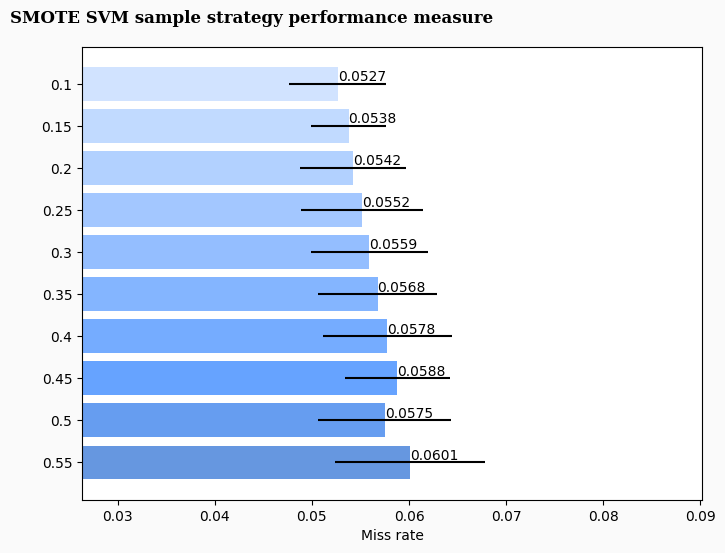

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**4.5 SMOTE SVM technique and its cross validation for optimizing sampling strategy**

def smotesvm_cross_val(X, y, values):

    x_labels = list()
    mean_accuracy_cv = list()
    std_accuracy_cv = list()

    model = RandomForestClassifier()

    for i in values:
      over = SVMSMOTE(sampling_strategy=i, random_state=1234)
      steps = [('over', over),
               ('model', model)]
      pipeline = Pipeline(steps=steps)

      impute_scores = 1 - cross_val_score(
          pipeline, X, y, scoring="recall_weighted", cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
      )
      mean_accuracy_cv.append(impute_scores.mean())
      std_accuracy_cv.append(impute_scores.std())

    return mean_accuracy_cv, std_accuracy_cv

smote_svm_strat_values = np.arange(0.1, 0.6, 0.05)
result = smotesvm_cross_val(X_train, y_train, smote_svm_strat_values)

fig = plt.figure(figsize=(8, 6), dpi=100, facecolor="#fafafa")
ax = plt.subplot(111)
n_bars = len(result[0])
xval = np.arange(n_bars)
colors = ["#b3d1ff", "#99c2ff", "#80b3ff", "#66a3ff", "#4d94ff", "#3385ff", "#1a75ff", "#0066ff", "#005ce6",
          "#0052cc", "#0047b3", "#003d99", "#003380", "#002966", "#001f4d", "#001433"]
for j in xval:
    ax.barh(
        j,
        result[0][j],
        xerr=result[1][j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )
    ax.text(result[0][j], j, str(result[0][j].round(4)), color='black', fontsize=10, ha='left', va='bottom')


ax.set_xlim(left=np.min(result[0]) * 0.5, right=np.max(result[0]) * 1.5)
ax.set_yticks(xval)
ax.set_xlabel("Miss rate")
ax.invert_yaxis()
ax.set_yticklabels(smote_strat_values.round(2))
fig.text(0.035, 0.92, "SMOTE SVM sample strategy performance measure", fontfamily='serif', fontsize=12, fontweight='bold')

plt.show()



There is no significant difference in term of performance. Syntectic examples are not affected the crossvalidation result as we would expect. However my expectation is that more examples will help to achieve better backtest result on the test set later on.

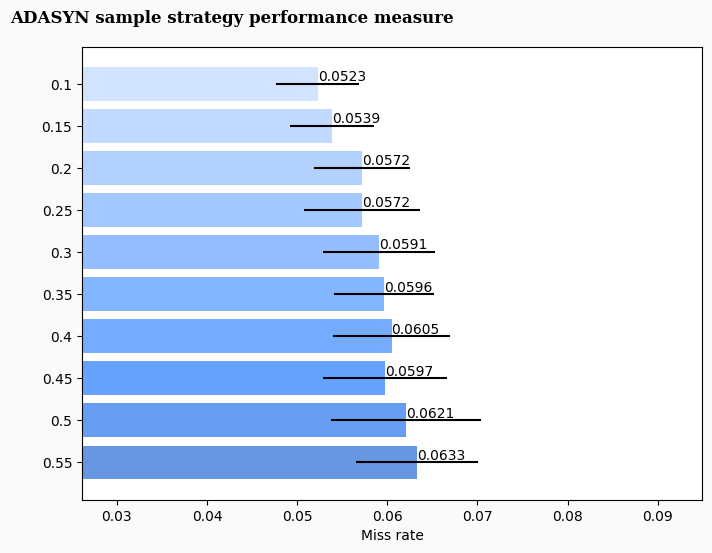

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**4.6 ADASYN technique and its cross validation for optimizing sampling strategy**

def adasync_cross_val(X, y, values):

    x_labels = list()
    mean_accuracy_cv = list()
    std_accuracy_cv = list()

    model = RandomForestClassifier()

    for i in values:
      over = ADASYN(sampling_strategy=i, random_state=1234)
      steps = [('over', over),
               ('model', model)]
      pipeline = Pipeline(steps=steps)

      impute_scores = 1 - cross_val_score(
          pipeline, X, y, scoring="recall_weighted", cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
      )
      mean_accuracy_cv.append(impute_scores.mean())
      std_accuracy_cv.append(impute_scores.std())

    return mean_accuracy_cv, std_accuracy_cv

adasyn_strat_values = np.arange(0.1, 0.6, 0.05)
result = adasync_cross_val(X_train, y_train, adasyn_strat_values)

fig = plt.figure(figsize=(8, 6), dpi=100, facecolor="#fafafa")
ax = plt.subplot(111)
n_bars = len(result[0])
xval = np.arange(n_bars)
colors = ["#b3d1ff", "#99c2ff", "#80b3ff", "#66a3ff", "#4d94ff", "#3385ff", "#1a75ff", "#0066ff", "#005ce6",
          "#0052cc", "#0047b3", "#003d99", "#003380", "#002966", "#001f4d", "#001433"]
for j in xval:
    ax.barh(
        j,
        result[0][j],
        xerr=result[1][j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )
    ax.text(result[0][j], j, str(result[0][j].round(4)), color='black', fontsize=10, ha='left', va='bottom')


ax.set_xlim(left=np.min(result[0]) * 0.5, right=np.max(result[0]) * 1.5)
ax.set_yticks(xval)
ax.set_xlabel("Miss rate")
ax.invert_yaxis()
ax.set_yticklabels(smote_strat_values.round(2))
fig.text(0.035, 0.92, "ADASYN sample strategy performance measure", fontfamily='serif', fontsize=12, fontweight='bold')

plt.show()



This is very similiar like the previous approach, there is a little bit higher difference between 0.1 and 0.55 resampling strategy.

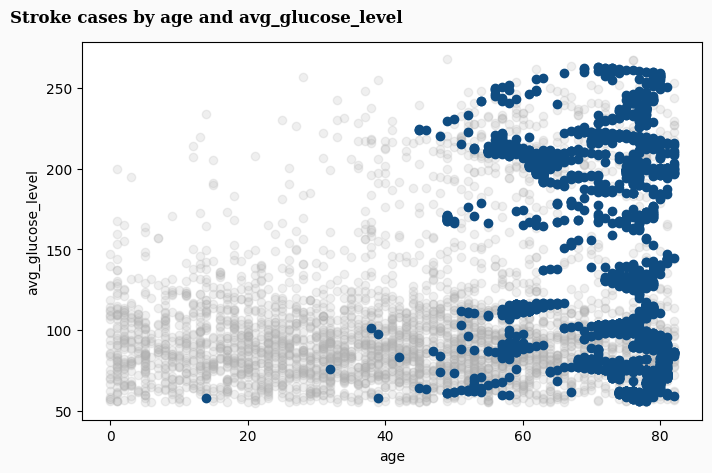

,Original,Original in %,Resampled,Resampled in %
0,3407,95.0,3407,60.0
1,170,5.0,2229,40.0


In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**4.7 Final sampling technique to be used**

svm_smote = SVMSMOTE(random_state=1234)
X_train_resample, y_train_resample = svm_smote.fit_resample(X_train.copy(), y_train.copy())
fig = plt.figure(figsize=(8, 5), dpi=100, facecolor="#fafafa")
ax = plt.subplot(111)
colors = ["#B1B1B1", "#0f4c81"]
alpha = [0.2, 1]
for label, _ in Counter(y_train_resample).items():
    row_ix = np.where(y_train_resample == label)[0]
    ax.scatter(X_train_resample.iloc[row_ix, 0], X_train_resample.iloc[row_ix, 3], label=str(label), c=colors[label], alpha=alpha[label])
    
ax.set_ylabel('avg_glucose_level')
ax.set_xlabel("age")

fig.text(0.035, 0.92, f'Stroke cases by age and avg_glucose_level', fontfamily='serif', fontsize=12,
                 fontweight='bold')
plt.show()

sample_summary = pd.DataFrame({"Original": [np.shape(y_train)[0] - y_train.sum(), y_train.sum()],
                    "Original in %": [round((np.shape(y_train)[0] - y_train.sum()) / np.shape(y_train)[0],2) * 100,round(y_train.sum() / np.shape(y_train)[0],2) * 100],
                    "Resampled": [np.shape(y_train_resample)[0] - y_train_resample.sum(), y_train_resample.sum()],
                    "Resampled in %": [round((np.shape(y_train_resample)[0] - y_train_resample.sum()) / np.shape(y_train_resample)[0],2) * 100,round(y_train_resample.sum() / np.shape(y_train_resample)[0],2) * 100]})

cell_hover = { 
    'selector': 'td:hover',
    'props': [('background-color', 'lightblue'), ('font-style', 'serif')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: serif; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #0f4c81; color: white;font-style: serif;'
}
sample_summary.style.set_table_styles([cell_hover, index_names, headers])
sample_summary

I have decided to choose the automatic strategy of SVMSMOTE as it provided the lowest missrate during the crossvalidation among the other 3 automatic resampling technique. Also trying out different resampling strategy values, it suggest to use a lower resampling stretegy, however the models wont capture the relationship between stroke cases and the variables. Final train dataset has a close balanced dataset, with many syntetic stroke examples, enrichies the data with 13x more artificial stroke cases.

# **5.0 Feature engineering**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


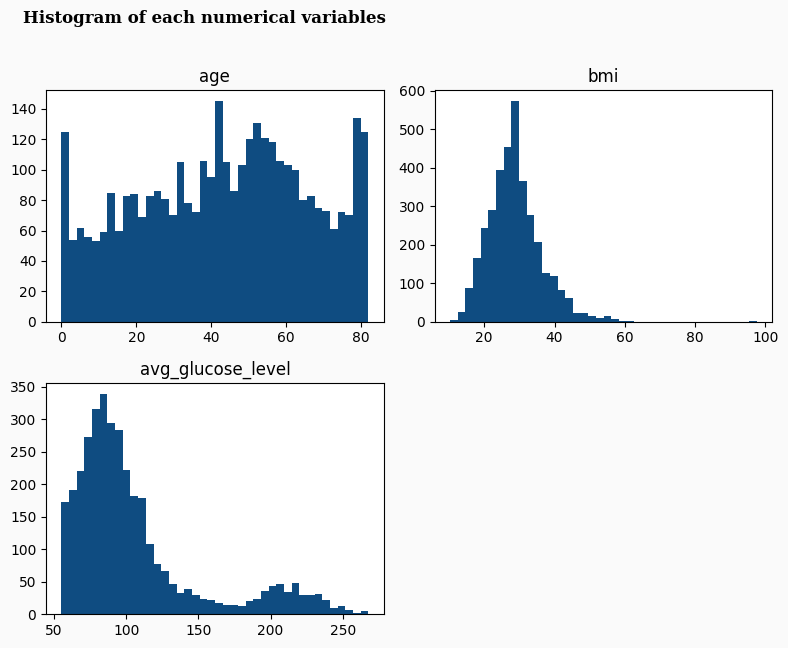

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**5.2 Before variable transformation**
# histogram of numerical variables
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor="#fafafa")
X_train[["age", "bmi", "avg_glucose_level"]].hist(bins=40, ax=ax, color="#0f4c81", grid=False)
fig.text(0.035, 1.05, f'Histogram of each numerical variables', fontfamily='serif', fontsize=12, fontweight='bold')
fig.tight_layout()
plt.show()

# 


BMI suffers from outliers on the left tail of the distribution. Lets see, what can be seen on the dataset.

In [ ]:
dataset[dataset["bmi"] > 70]

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,ever_married_No
544,0,42,0,0,210.48,71.9,0,1,0,0,1,0,1,0,0,1,0
928,0,23,1,0,70.03,78.0,1,0,0,0,1,0,0,0,0,0,1
2128,0,17,1,0,61.67,97.6,0,1,0,0,1,0,1,1,0,0,1
4209,0,38,1,0,56.90,92.0,0,1,0,0,1,0,1,0,0,1,0


The distribution would suggest to handle such an outlier, but according to the wikipedia list of heaviest people, it is possible to achieve over 90 Body mass index. Therefore i wont replace these 2 values above 90.

### &nbsp;&nbsp;&nbsp;&nbsp;**5.3 Transformation**


In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**5.3.1 Transformation using Yeo-Johnson transformer, Quantile transformer, Minmaxscaler, and Standardscaler**

def variable_powertransformer(train, test, columns, method):

    pt_yeo = PowerTransformer(method='yeo-johnson')
    minmaxScaler = MinMaxScaler()
    standardScaler = StandardScaler()
    pt_quant = QuantileTransformer(n_quantiles=1000,
                                       output_distribution="normal",
                                       random_state=1234)

    for column in columns:
        if method in 'yeo-johnson':
            trans_yeo = pt_yeo.fit(train.loc[:, column].to_numpy().reshape(-1,1))
            train.loc[:, column] = trans_yeo.transform(train.loc[:, column].to_numpy().reshape(-1,1))
            test.loc[:, column] = trans_yeo.transform(test.loc[:, column].to_numpy().reshape(-1,1))


        if method in 'quantile':
            trans_quant = pt_quant.fit(train.loc[:, column].to_numpy().reshape(-1,1))
            train.loc[:, column] = trans_quant.transform(train.loc[:, column].to_numpy().reshape(-1,1))
            test.loc[:, column] = trans_quant.transform(test.loc[:, column].to_numpy().reshape(-1,1))


        if method in 'minmaxscale':
            trans_minmax = minmaxScaler.fit(train.loc[:, column].to_numpy().reshape(-1,1))
            train.loc[:, column] = trans_minmax.transform(train.loc[:, column].to_numpy().reshape(-1,1))
            test.loc[:, column] = trans_minmax.transform(test.loc[:, column].to_numpy().reshape(-1,1))


        if method in 'standardscale':
            trans_standard = standardScaler.fit(train.loc[:, column].to_numpy().reshape(-1,1))
            train.loc[:, column] = trans_standard.transform(train.loc[:, column].to_numpy().reshape(-1,1))
            test.loc[:, column] = trans_standard.transform(test.loc[:, column].to_numpy().reshape(-1,1))
    
    return train, test


X_train_resample_yeo, X_test_yeo = variable_powertransformer(X_train_resample.copy(),
                                                             X_test.copy(),
                                                             ["age", "bmi", "avg_glucose_level"],
                                                             "yeo-johnson")

X_train_resample_quant, X_test_quant = variable_powertransformer(X_train_resample.copy(),
                                                             X_test.copy(),
                                                             ["age", "bmi", "avg_glucose_level"],
                                                             "quantile")

X_train_resample_minmax, X_test_minmax = variable_powertransformer(X_train_resample.copy(),
                                                             X_test.copy(),
                                                             ["age", "bmi", "avg_glucose_level"],
                                                             "minmaxscale")

X_train_resample_standard, X_test_standard = variable_powertransformer(X_train_resample.copy(),
                                                             X_test.copy(),
                                                             ["age", "bmi", "avg_glucose_level"],
                                                             "standardscale")

Ensemble learners do not require to have scaled or normalized features, however models with linear relationships do like logistic regression. Automatic transformation are applied here with Yeo-Johnson and Quantile transformator, which are powerful methods and in many cases can reach higher model performance. Also more traditional scalers like standard scaler and minmax are being estimated as well. Lets see, which performs the best.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


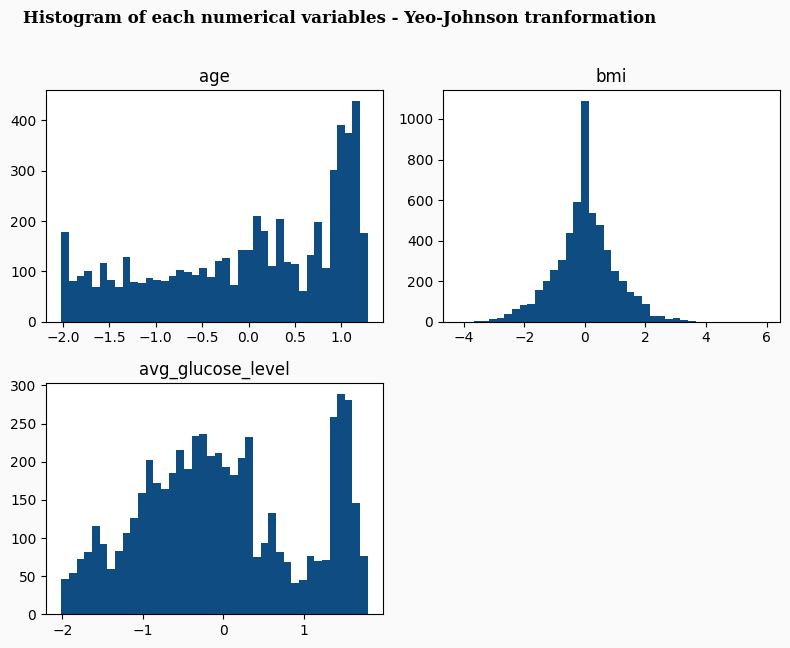

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**5.3.1.1 After tranformation - Yeo- Johnson**

# histogram of numerical variables
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor="#fafafa")
X_train_resample_yeo[["age", "bmi", "avg_glucose_level"]].hist(bins=40, ax=ax, color="#0f4c81", grid=False)
fig.text(0.035, 1.05, f'Histogram of each numerical variables - Yeo-Johnson tranformation', fontfamily='serif', fontsize=12, fontweight='bold')
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


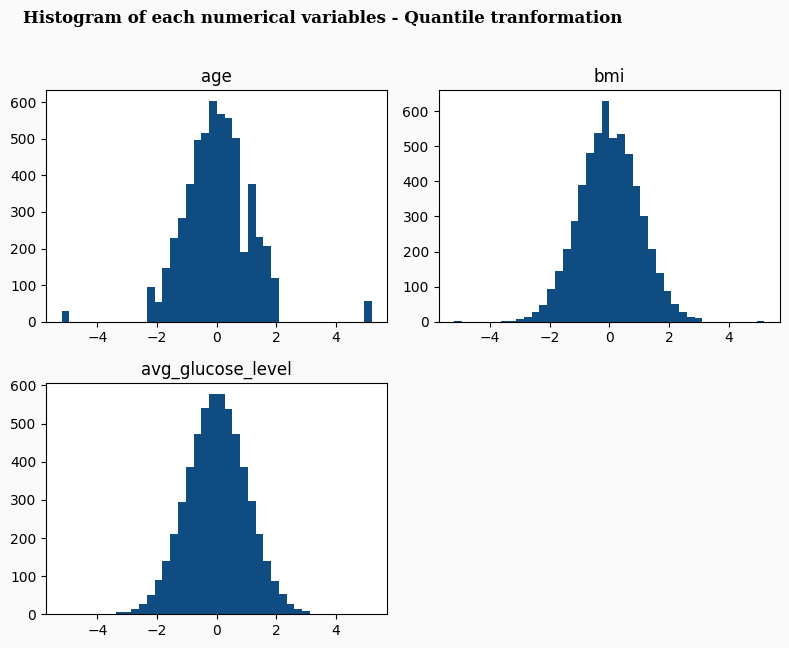

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**5.3.1.2 After tranformation - Quantile transformation**

# histogram of numerical variables
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor="#fafafa")
X_train_resample_quant[["age", "bmi", "avg_glucose_level"]].hist(bins=40, ax=ax, color="#0f4c81", grid=False)
fig.text(0.035, 1.05, f'Histogram of each numerical variables - Quantile tranformation', fontfamily='serif', fontsize=12, fontweight='bold')
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


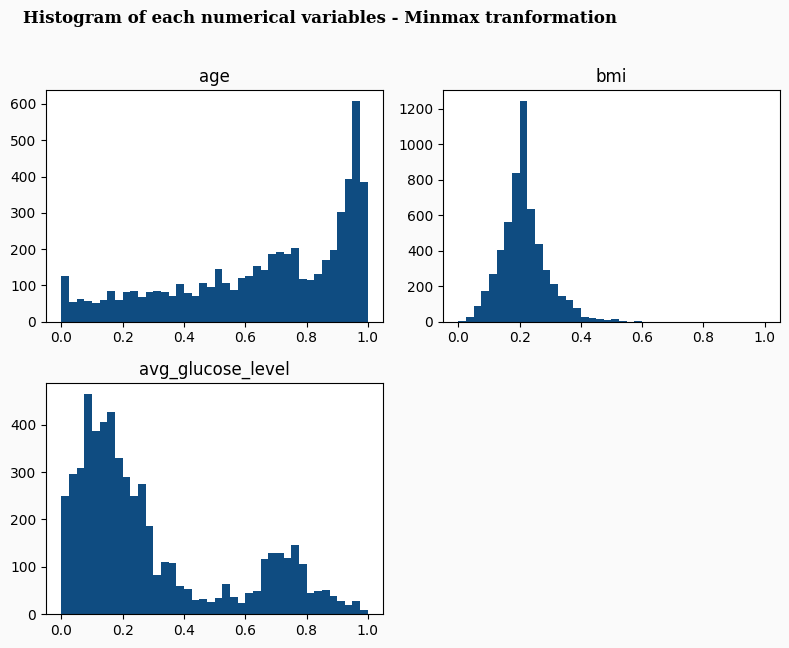

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**5.3.1.3 After tranformation - Minmax scaling**

# histogram of numerical variables
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor="#fafafa")
X_train_resample_minmax[["age", "bmi", "avg_glucose_level"]].hist(bins=40, ax=ax, color="#0f4c81", grid=False)
fig.text(0.035, 1.05, f'Histogram of each numerical variables - Minmax tranformation', fontfamily='serif', fontsize=12, fontweight='bold')
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


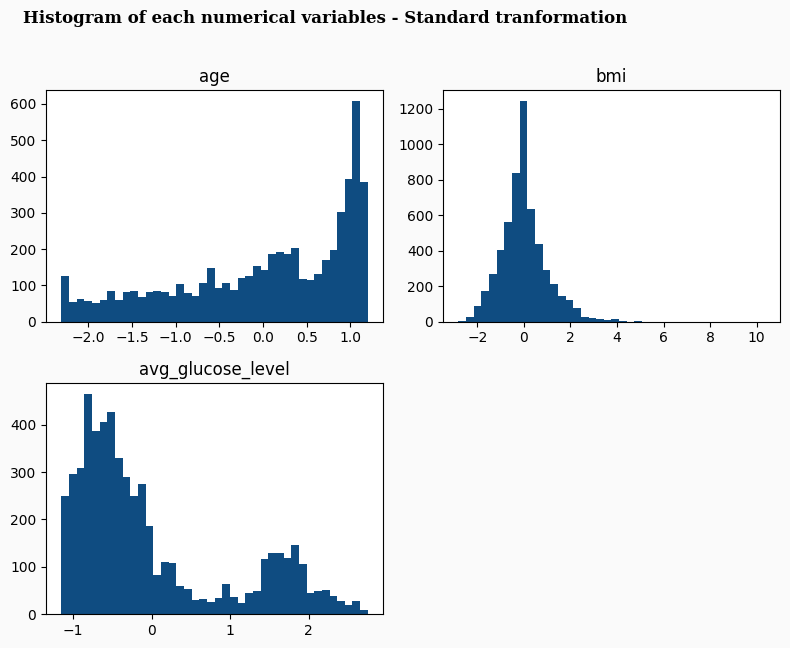

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**5.3.1.4 After tranformation - Standard scaling**

# histogram of numerical variables
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor="#fafafa")
X_train_resample_standard[["age", "bmi", "avg_glucose_level"]].hist(bins=40, ax=ax, color="#0f4c81", grid=False)
fig.text(0.035, 1.05, f'Histogram of each numerical variables - Standard tranformation', fontfamily='serif', fontsize=12, fontweight='bold')
fig.tight_layout()
plt.show()

From the different transformations, we can clearly see the difference between normalization and scaling. Scaling will only change the range of the distribution, and scaling tries to create a more like Gaussian distribution. As we can see, yeo-johnson kept the original distribution more closely to the original comparing to the quantile transformer. Both automatic transformation method uses standardization after normalization.

# **6.0 Modeling phase**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,95.0,0.0,0.0,0.0,83.0,LogisticRegression


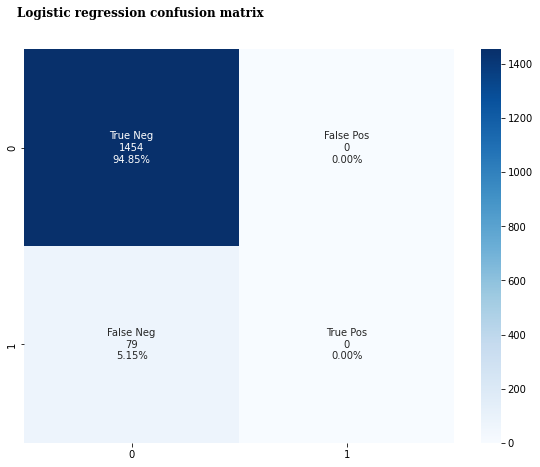

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**6.1 Logistic regression with Null model, using original dataset (no resampling)**

model = LogisticRegression(penalty='none',
                           dual=False,
                           tol=0.0001,
                           C=1.0,
                           fit_intercept=True,
                           intercept_scaling=1,
                           class_weight=None,
                           random_state=1234,
                           solver='lbfgs',
                           max_iter=1000,
                           multi_class="auto",
                           verbose=0,
                           warm_start=False,
                           n_jobs=None,
                           l1_ratio=None)


model.fit(X_train,y_train)
        
#backtest
y_preds = model.predict(X_test)
y_probs = model.predict_proba(X_test)

backtest = list()

backtest.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
backtest.append((round(metrics.precision_score(y_test,y_preds),2))*100)
backtest.append((round(metrics.recall_score(y_test,y_preds),2))*100)
backtest.append((round(metrics.f1_score(y_test,y_preds),2))*100)
backtest.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
backtest.append(metrics.confusion_matrix(y_test,y_preds))

results_df = pd.DataFrame({"Accuracy Score":backtest[0],"Precision Score":backtest[1],
                "Recall Score":backtest[2], "f1 Score":backtest[3],"AUC Score":backtest[4],
                "Algorithm":["LogisticRegression"]})

display(results_df)

cf_matrix = metrics.confusion_matrix(y_test, y_preds)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8,6)) 
fig.text(0.035, 1.05, f'Logistic regression confusion matrix', fontfamily='serif', fontsize=12, fontweight='bold')
sb.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
fig.tight_layout()


Demonstrating how the Null model performns, which is clearly the wrong direction in this highly imbalanced case. Therefore moving to resampling technique is mandantory.

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;**6.2 Resampling with SVMSMOTE using different algos**

def predictions(x_train,y_train, x_test, y_test, title):
    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]
        
    random_state = 1234
    
    #models 
    models = []
    models.append(SVC(random_state=random_state, probability = True))
    models.append(ExtraTreesClassifier(random_state=random_state))
    models.append(RandomForestClassifier(random_state=random_state))
    models.append(KNeighborsClassifier())
    models.append(LogisticRegression(random_state = random_state))
    models.append(XGBClassifier(random_state = random_state,eval_metric = 'logloss',learning_rate = 0.054))


    for model in models:

        #classifier and fitting
        clf = model
        clf.fit(x_train,y_train)
        
        #predictions
        y_preds = clf.predict(x_test)
        y_probs = clf.predict_proba(x_test)
        
        # metrics
        accuracy.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
        precision.append((round(metrics.precision_score(y_test,y_preds),2))*100)
        recall.append((round(metrics.recall_score(y_test,y_preds),2))*100)
        testerror.append((round(1-metrics.recall_score(y_test,y_preds),2))*100)
        f1.append((round(metrics.f1_score(y_test,y_preds),2))*100)
        auc.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
        conf_mat.append(metrics.confusion_matrix(y_test,y_preds))
        
    results_df = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["SVC","ExtraTreesClassifier",
                                     "RandomForest",
                                     "KNeighboors","LogisticRegression",
                                     "XGBoost"]})
    
    results_df = (results_df.sort_values(by = 'Test error', ascending = True)
                  .reset_index(drop =  True))
    results_df = results_df.style.set_caption(title)

    return display(results_df)

predictions(X_train_resample_standard[['age','bmi', 'avg_glucose_level']],
            y_train_resample,
            X_train_resample_standard[['age','bmi', 'avg_glucose_level']],
            y_train_resample, 'Train prediction')


,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,ExtraTreesClassifier
1,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,RandomForest
2,3.000000,93.000000,87.000000,97.000000,92.000000,99.000000,KNeighboors
3,11.000000,86.000000,79.000000,89.000000,83.000000,94.000000,XGBoost
4,13.000000,85.000000,77.000000,87.000000,82.000000,91.000000,SVC
5,17.000000,83.000000,76.000000,83.000000,80.000000,90.000000,LogisticRegression


Clearly overfitting can be observed in many models, even if i have reduced the number of features for those 3 variables, that included the most variance.

In [ ]:
predictions(X_train_resample_standard[['age','bmi', 'avg_glucose_level']], y_train_resample , X_test_standard[['age','bmi', 'avg_glucose_level']] , y_test, "Test prediction")

,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,38.000000,83.000000,17.000000,62.000000,27.000000,80.000000,SVC
1,39.000000,83.000000,17.000000,61.000000,27.000000,83.000000,XGBoost
2,42.000000,83.000000,17.000000,58.000000,26.000000,83.000000,LogisticRegression
3,61.000000,85.000000,14.000000,39.000000,21.000000,69.000000,KNeighboors
4,73.000000,89.000000,16.000000,27.000000,20.000000,80.000000,RandomForest
5,78.000000,89.000000,13.000000,22.000000,16.000000,78.000000,ExtraTreesClassifier


Test error is huge, that is another sign of overfitting on the train sample. Addressing with reduced number of features, does not solve the overfitting problem. Training with more data could help to capture the relationship, but it is not possible. 
What can be done are :
#####Hyperparameter tuning using cross validation for optimizing false negative rate.

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.3 Hyperparameter tuning using randomized search - cross validation - backtest performance on train and test set (each segment runs approx. 10mins, so 40mins can be expected here)** 
def prediction_hyper(X_train, y_train, X_test, y_test):


    best_params = dict()
    model_dict = dict()
    #########################################################################
    # 1. ExtraTreesClassifier
    #########################################################################

    
    # Hyperparameters
    # Hyperparameters
    n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    params = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}


    # Choose regression model
    recall_scorer = make_scorer(metrics.recall_score)
    randomized = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1234, class_weight="balanced"),
                                    param_distributions=params,
                                    n_iter=10,
                                    cv=5,
                                    verbose=1,
                                    random_state=1234,
                                    n_jobs=-1, 
                                    scoring={"recall_macro":recall_scorer},
                                    refit="recall_macro")

    # Fit the random search model
    randomized.fit(X_train, y_train)

    # Get best parameters
    best_params['ExtreTreesClassifier' + '_' + "_best_params"] = randomized.best_params_

    model = ExtraTreesClassifier(n_estimators=randomized.best_params_['n_estimators'],
                                  min_samples_split=randomized.best_params_['min_samples_split'],
                                  min_samples_leaf=randomized.best_params_['min_samples_leaf'],
                                  max_features=randomized.best_params_['max_features'],
                                  max_depth=randomized.best_params_['max_depth'],
                                  bootstrap=randomized.best_params_['bootstrap'],
                                  class_weight="balanced",
                                 random_state=1234)
    
    model.fit(X_train,y_train)
    model_dict['ExtreTreesClassifier' + '_' + "_model"] = model    
    # metrics
    # train
    y_preds = model.predict(X_train)
    y_probs = model.predict_proba(X_train)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_train,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_train,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_train,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_train,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_train,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_train,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_train,y_preds))

    results_train_ext = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["ExtraTreesClassifier"]})
  

    # test
    y_preds = model.predict(X_test)
    y_probs = model.predict_proba(X_test)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_test,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_test,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_test,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_test,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_test,y_preds))

    results_test_ext = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["ExtraTreesClassifier"]})

    
    #########################################################################
    # 2. Logistic regression
    #########################################################################

    
    # Hyperparameters
    params = {"solver": ['newton-cg', 'lbfgs', 'liblinear'],
              "penalty": ['l2'],
              "C": [100.0, 10.0, 1.0, 0.1, 0.01]}


    # Choose regression model
    recall_scorer = make_scorer(metrics.recall_score)
    randomized = RandomizedSearchCV(estimator=LogisticRegression( class_weight="balanced",random_state=1234),
                                    param_distributions=params,
                                    n_iter=10,
                                    cv=5,
                                    verbose=1,
                                    random_state=1234,
                                    n_jobs=-1, 
                                    scoring={"recall_macro":recall_scorer},
                                    refit="recall_macro")

    # Fit the random search model
    randomized.fit(X_train, y_train)

    # Get best parameters
    best_params['LogisticRegression' + '_' + "_best_params"] = randomized.best_params_

    model = LogisticRegression(solver=randomized.best_params_["solver"],
                                 penalty=randomized.best_params_['penalty'],
                                 C=randomized.best_params_['C'],
                                class_weight="balanced",
                                 random_state=1234)
    
    model.fit(X_train,y_train)
    model_dict['LogisticRegression' + '_' + "_model"] = model     
    # metrics
    # train
    y_preds = model.predict(X_train)
    y_probs = model.predict_proba(X_train)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_train,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_train,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_train,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_train,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_train,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_train,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_train,y_preds))

    results_train_log = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["LogisticRegression"]})
  

    # test
    y_preds = model.predict(X_test)
    y_probs = model.predict_proba(X_test)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_test,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_test,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_test,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_test,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_test,y_preds))

    results_test_log = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["LogisticRegression"]})





    #########################################################################
    # 3. KNeighborsClassifier
    #########################################################################

    
    # Hyperparameters
    params = {"leaf_size": list(range(1,50)),
              "n_neighbors": list(range(1,30)),
              "p":[1,2]}



    # recall scorer
    recall_scorer = make_scorer(metrics.recall_score)
    randomized = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                    param_distributions=params,
                                    n_iter=10,
                                    cv=5,
                                    verbose=1,
                                    random_state=1234,
                                    n_jobs=-1, 
                                    scoring={"recall_macro":recall_scorer},
                                    refit="recall_macro")

    # Fit the random search model
    randomized.fit(X_train, y_train)

    # Get best parameters
    best_params['KNeighborsClassifier' + '_' + "_best_params"] = randomized.best_params_

    model = KNeighborsClassifier(leaf_size=randomized.best_params_["leaf_size"],
                                 n_neighbors=randomized.best_params_['n_neighbors'],
                                 p=randomized.best_params_['p'])
    
    model.fit(X_train,y_train)
    model_dict['KNeighborsClassifier' + '_' + "_model"] = model     

    # metrics
    # train
    y_preds = model.predict(X_train)
    y_probs = model.predict_proba(X_train)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_train,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_train,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_train,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_train,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_train,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_train,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_train,y_preds))

    results_train_knc = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["KNeighborsClassifier"]})
  

    # test
    y_preds = model.predict(X_test)
    y_probs = model.predict_proba(X_test)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_test,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_test,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_test,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_test,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_test,y_preds))

    results_test_knc = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["KNeighborsClassifier"]})



    #########################################################################
    # 4. XGBoost
    #########################################################################

    
    # Hyperparameters
    params = {'max_depth': [3, 5, 6, 10, 15, 20],
              'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.4, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
              'n_estimators': [100, 500, 1000]}



    # recall scorer
    recall_scorer = make_scorer(metrics.recall_score)
    randomized = RandomizedSearchCV(estimator=XGBClassifier(random_state=1234),
                                    param_distributions=params,
                                    n_iter=10,
                                    cv=5,
                                    verbose=1,
                                    random_state=1234,
                                    n_jobs=-1, 
                                    scoring={"recall_macro":recall_scorer},
                                    refit="recall_macro")

    # Fit the random search model
    randomized.fit(X_train, y_train)

    # Get best parameters
    best_params['XGBoost' + '_' + "_best_params"] = randomized.best_params_

    model = XGBClassifier(max_depth=randomized.best_params_["max_depth"],
                          learning_rate=randomized.best_params_['learning_rate'],
                          subsample=randomized.best_params_['subsample'],
                          colsample_bytree=randomized.best_params_['colsample_bytree'],
                          colsample_bylevel=randomized.best_params_['colsample_bylevel'],
                          n_estimators=randomized.best_params_['n_estimators'],
                          random_state=1234)
    
    model.fit(X_train,y_train)
    model_dict['XGBoost' + '_' + "_model"] = model     

    # metrics
    # train
    y_preds = model.predict(X_train)
    y_probs = model.predict_proba(X_train)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_train,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_train,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_train,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_train,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_train,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_train,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_train,y_preds))

    results_train_xgb = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["XGBoost"]})
  

    # test
    y_preds = model.predict(X_test)
    y_probs = model.predict_proba(X_test)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_test,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_test,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_test,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_test,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_test,y_preds))

    results_test_xgb = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["XGBoost"]})



    #########################################################################
    # 5. SupportVectorClassifier
    #########################################################################

    
    # Hyperparameters
    svc_grid = {'C': [0.1,1, 10, 100],
                'gamma': [1,0.1,0.01,0.001],
                'kernel': ['rbf', 'poly', 'sigmoid']}


    # recall scorer
    recall_scorer = make_scorer(metrics.recall_score)
    randomized = RandomizedSearchCV(estimator=SVC(class_weight="balanced", probability = True,
                                                  random_state=1234),
                                    param_distributions=svc_grid,
                                    n_iter=10,
                                    cv=5,
                                    verbose=1,
                                    random_state=1234,
                                    n_jobs=-1, 
                                    scoring={"recall_macro":recall_scorer},
                                    refit="recall_macro")

    # Fit the random search model
    randomized.fit(X_train, y_train)

    # Get best parameters
    best_params['SupportVectorClassifier' + '_' + "_best_params"] = randomized.best_params_

    model = SVC(probability = True, class_weight="balanced",
                C=randomized.best_params_['C'],
                gamma=randomized.best_params_['gamma'],
                kernel=randomized.best_params_['kernel'],
                random_state=1234)
    
    model.fit(X_train,y_train)
    model_dict['SupportVectorClassifier' + '_' + "_model"] = model     
    
    # metrics
    # train
    y_preds = model.predict(X_train)
    y_probs = model.predict_proba(X_train)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_train,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_train,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_train,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_train,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_train,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_train,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_train,y_preds))

    results_train_svc = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["SupportVectorClassifier"]})
  

    # test
    y_preds = model.predict(X_test)
    y_probs = model.predict_proba(X_test)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_test,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_test,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_test,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_test,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_test,y_preds))

    results_test_svc = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["SupportVectorClassifier"]})

    #########################################################################
    # 6. Randomforestclassifier
    #########################################################################
    
    # Hyperparameters
    n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap}

    # recall scorer
    recall_scorer = make_scorer(metrics.recall_score)
    randomized = RandomizedSearchCV(estimator=RandomForestClassifier( class_weight="balanced", random_state=1234),
                                    param_distributions=random_grid,
                                    n_iter=10,
                                    cv=5,
                                    verbose=1,
                                    random_state=1234,
                                    n_jobs=-1, 
                                    scoring={"recall_macro":recall_scorer},
                                    refit="recall_macro")

    # Fit the random search model
    randomized.fit(X_train, y_train)

    # Get best parameters
    best_params['RandomforestClassifier' + '_' + "_best_params"] = randomized.best_params_

    model = RandomForestClassifier(n_estimators=randomized.best_params_['n_estimators'],
                                  min_samples_split=randomized.best_params_['min_samples_split'],
                                  min_samples_leaf=randomized.best_params_['min_samples_leaf'],
                                  max_features=randomized.best_params_['max_features'],
                                  max_depth=randomized.best_params_['max_depth'],
                                  bootstrap=randomized.best_params_['bootstrap'],
                                  class_weight="balanced",
                                  random_state=1234)
    
    model.fit(X_train,y_train)
    model_dict['RandomforestClassifier' + '_' + "_model"] = model     

    # metrics
    # train
    y_preds = model.predict(X_train)
    y_probs = model.predict_proba(X_train)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_train,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_train,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_train,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_train,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_train,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_train,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_train,y_preds))

    results_train_random = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["Randomforest"]})
  

    # test
    y_preds = model.predict(X_test)
    y_probs = model.predict_proba(X_test)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_test,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_test,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_test,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_test,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_test,y_preds))

    results_test_random = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["Randomforest"]})
    


    #########################################################################
    # 7. LightXGBClassifier
    #########################################################################
    
    param_grid = {
        "n_estimators": [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
        "learning_rate": [0.01, 0.3],
        "num_leaves": [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
        "max_depth": [3,6, 12],
        "min_data_in_leaf": [int(x) for x in np.linspace(start=200, stop=10000, num=100)],
        "max_bin": [200, 300],
        "lambda_l1": [int(x) for x in np.linspace(start=0, stop=100, num=5)],
        "lambda_l2": [int(x) for x in np.linspace(start=0, stop=100, num=5)],
        "min_gain_to_split": [0, 15]
    }

    # recall scorer
    recall_scorer = make_scorer(metrics.recall_score)
    randomized = RandomizedSearchCV(estimator=LGBMClassifier( class_weight="balanced", random_state=1234),
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    cv=5,
                                    verbose=1,
                                    random_state=1234,
                                    n_jobs=-1, 
                                    scoring={"recall_macro":recall_scorer},
                                    refit="recall_macro")

    # Fit the random search model
    randomized.fit(X_train, y_train)

    # Get best parameters
    best_params['LGBMClassifier' + '_' + "_best_params"] = randomized.best_params_

    model = LGBMClassifier(n_estimators=randomized.best_params_['n_estimators'],
                           learning_rate=randomized.best_params_['learning_rate'],
                           num_leaves=randomized.best_params_['num_leaves'],
                           max_depth=randomized.best_params_['max_depth'],
                           min_data_in_leaf=randomized.best_params_['min_data_in_leaf'],
                           max_bin=randomized.best_params_['max_bin'],
                           lambda_l1=randomized.best_params_['lambda_l1'],
                           lambda_l2=randomized.best_params_['lambda_l2'],
                           min_gain_to_split=randomized.best_params_['min_gain_to_split'],
                           class_weight="balanced",
                           random_state=1234)
    
    model.fit(X_train,y_train)
    model_dict['LGBMClassifier' + '_' + "_model"] = model     

    # metrics
    # train
    y_preds = model.predict(X_train)
    y_probs = model.predict_proba(X_train)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_train,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_train,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_train,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_train,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_train,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_train,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_train,y_preds))

    results_train_lgbm = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["LightGBM"]})
  

    # test
    y_preds = model.predict(X_test)
    y_probs = model.predict_proba(X_test)

    testerror,accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[],[]

    accuracy.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
    precision.append((round(metrics.precision_score(y_test,y_preds),2))*100)
    recall.append((round(metrics.recall_score(y_test,y_preds),2))*100)
    testerror.append((round(1-metrics.recall_score(y_test,y_preds),2))*100)
    f1.append((round(metrics.f1_score(y_test,y_preds),2))*100)
    auc.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
    conf_mat.append(metrics.confusion_matrix(y_test,y_preds))

    results_test_lgbm = pd.DataFrame({"Test error": testerror,"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Algorithm":["LightGBM"]})
    


    # rowbind results train
    result_train = pd.concat([results_train_ext,
                              results_train_knc,
                              results_train_log,
                              results_train_random,
                              results_train_svc,
                              results_train_xgb,
                              results_train_lgbm], axis=0)


    results_train = (result_train.sort_values(by = 'Test error', ascending = True)
                  .reset_index(drop =  True))
    results_train = results_train.style.set_caption("Train backtest result")

    # rowbind results test
    results_test = pd.concat([results_test_ext,
                              results_test_knc,
                              results_test_log,
                              results_test_random,
                              results_test_svc,
                              results_test_xgb,
                              results_test_lgbm], axis=0)
    
    results_test = (results_test.sort_values(by = 'Test error', ascending = True)
                  .reset_index(drop =  True))
    results_test = results_test.style.set_caption("Test backtest result")


    return results_train, results_test, best_params, model_dict

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.3.1 StandardScaling**

results_train_standard, results_test_standard, params_standard, models_standard = prediction_hyper(X_train_resample_standard[['age','bmi', 'avg_glucose_level']], y_train_resample, X_test_standard[['age','bmi', 'avg_glucose_level']], y_test)

display(results_train_standard)

display(results_test_standard)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,0.000000,99.000000,99.000000,100.000000,99.000000,100.000000,ExtraTreesClassifier
1,0.000000,57.000000,48.000000,100.000000,65.000000,87.000000,SupportVectorClassifier
2,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,XGBoost
3,2.000000,93.000000,87.000000,98.000000,92.000000,99.000000,Randomforest
4,5.000000,89.000000,81.000000,95.000000,88.000000,97.000000,KNeighborsClassifier
5,5.000000,80.000000,68.000000,95.000000,79.000000,90.000000,LightGBM
6,10.000000,82.000000,72.000000,90.000000,80.000000,90.000000,LogisticRegression


,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,3.000000,33.000000,7.000000,97.000000,13.000000,84.000000,SupportVectorClassifier
1,22.000000,72.000000,13.000000,78.000000,23.000000,82.000000,LightGBM
2,25.000000,77.000000,15.000000,75.000000,25.000000,84.000000,LogisticRegression
3,49.000000,82.000000,15.000000,51.000000,23.000000,78.000000,KNeighborsClassifier
4,57.000000,85.000000,15.000000,43.000000,23.000000,82.000000,Randomforest
5,75.000000,87.000000,12.000000,25.000000,17.000000,82.000000,ExtraTreesClassifier
6,75.000000,89.000000,15.000000,25.000000,19.000000,75.000000,XGBoost


In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.3.2 MinmaxScaling**

results_train_minmax, results_test_minmax, params_minmax, models_minmax = prediction_hyper(X_train_resample_minmax[['age','bmi', 'avg_glucose_level']].copy() , y_train_resample.copy(), X_test_minmax[['age','bmi', 'avg_glucose_level']].copy(), y_test.copy())

display(results_train_minmax)

display(results_test_minmax)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,0.000000,99.000000,99.000000,100.000000,99.000000,100.000000,ExtraTreesClassifier
1,0.000000,40.000000,40.000000,100.000000,57.000000,12.000000,SupportVectorClassifier
2,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,XGBoost
3,2.000000,93.000000,87.000000,98.000000,92.000000,99.000000,Randomforest
4,3.000000,79.000000,67.000000,97.000000,79.000000,90.000000,LogisticRegression
5,4.000000,92.000000,85.000000,96.000000,90.000000,98.000000,KNeighborsClassifier
6,5.000000,80.000000,68.000000,95.000000,79.000000,90.000000,LightGBM


,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,0.000000,5.000000,5.000000,100.000000,10.000000,16.000000,SupportVectorClassifier
1,18.000000,71.000000,13.000000,82.000000,23.000000,84.000000,LogisticRegression
2,22.000000,72.000000,13.000000,78.000000,23.000000,82.000000,LightGBM
3,56.000000,85.000000,16.000000,44.000000,23.000000,77.000000,KNeighborsClassifier
4,57.000000,85.000000,15.000000,43.000000,23.000000,82.000000,Randomforest
5,75.000000,87.000000,12.000000,25.000000,17.000000,82.000000,ExtraTreesClassifier
6,75.000000,89.000000,15.000000,25.000000,19.000000,75.000000,XGBoost


In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.3.3 Yeo Johnson**

results_train_yeo, results_test_yeo, params_yeo, models_yeo = prediction_hyper(X_train_resample_yeo[['age','bmi', 'avg_glucose_level']] , y_train_resample, X_test_yeo[['age','bmi', 'avg_glucose_level']], y_test)

display(results_train_yeo)

display(results_test_yeo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,0.000000,51.000000,45.000000,100.000000,62.000000,88.000000,SupportVectorClassifier
1,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,XGBoost
2,2.000000,93.000000,85.000000,98.000000,91.000000,99.000000,ExtraTreesClassifier
3,2.000000,93.000000,87.000000,98.000000,92.000000,99.000000,Randomforest
4,4.000000,90.000000,82.000000,96.000000,88.000000,97.000000,KNeighborsClassifier
5,5.000000,80.000000,68.000000,95.000000,79.000000,90.000000,LightGBM
6,9.000000,82.000000,72.000000,91.000000,80.000000,90.000000,LogisticRegression


,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,1.000000,23.000000,6.000000,99.000000,12.000000,84.000000,SupportVectorClassifier
1,22.000000,72.000000,13.000000,78.000000,23.000000,82.000000,LightGBM
2,27.000000,78.000000,15.000000,73.000000,26.000000,84.000000,LogisticRegression
3,39.000000,83.000000,18.000000,61.000000,27.000000,78.000000,KNeighborsClassifier
4,46.000000,84.000000,17.000000,54.000000,26.000000,83.000000,ExtraTreesClassifier
5,57.000000,85.000000,15.000000,43.000000,23.000000,82.000000,Randomforest
6,77.000000,89.000000,14.000000,23.000000,17.000000,75.000000,XGBoost


In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.3.4 Quantile**

results_train_quant, results_test_quant, params_quant, models_quant = prediction_hyper(X_train_resample_quant[['age','bmi', 'avg_glucose_level']] , y_train_resample, X_test_quant[['age','bmi', 'avg_glucose_level']], y_test)

display(results_train_quant)

display(results_test_quant)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,0.000000,52.000000,45.000000,100.000000,62.000000,87.000000,SupportVectorClassifier
1,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,XGBoost
2,2.000000,97.000000,95.000000,98.000000,96.000000,100.000000,ExtraTreesClassifier
3,2.000000,93.000000,86.000000,98.000000,92.000000,99.000000,Randomforest
4,5.000000,89.000000,81.000000,95.000000,87.000000,97.000000,KNeighborsClassifier
5,5.000000,80.000000,68.000000,95.000000,79.000000,90.000000,LightGBM
6,11.000000,84.000000,74.000000,89.000000,81.000000,89.000000,LogisticRegression


,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,1.000000,24.000000,6.000000,99.000000,12.000000,83.000000,SupportVectorClassifier
1,22.000000,72.000000,13.000000,78.000000,23.000000,82.000000,LightGBM
2,33.000000,80.000000,16.000000,67.000000,26.000000,83.000000,LogisticRegression
3,47.000000,84.000000,16.000000,53.000000,25.000000,78.000000,KNeighborsClassifier
4,57.000000,85.000000,15.000000,43.000000,23.000000,82.000000,Randomforest
5,73.000000,87.000000,13.000000,27.000000,17.000000,81.000000,ExtraTreesClassifier
6,76.000000,88.000000,14.000000,24.000000,18.000000,74.000000,XGBoost


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.4 Aggregate results**


In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.4.1 Aggregate results - Train prediction**

results_train_standard.data["Transformation"] = "StandardScaling"
results_train_minmax.data["Transformation"] = "MinMaxScaling"
results_train_yeo.data["Transformation"] = "Yeo-Johnson"
results_train_quant.data["Transformation"] = "Quantile"

finish_train = pd.concat([results_train_standard.data,
                    results_train_minmax.data,
                    results_train_yeo.data,
                    results_train_quant.data], axis=0)

finish_train = (finish_train.sort_values(by = 'Test error', ascending = True).reset_index(drop =  True))
finish_train = finish_train.style.set_caption("Aggregated train backtest results")
display(finish_train)






,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm,Transformation
0,0.000000,99.000000,99.000000,100.000000,99.000000,100.000000,ExtraTreesClassifier,StandardScaling
1,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,XGBoost,Yeo-Johnson
2,0.000000,51.000000,45.000000,100.000000,62.000000,88.000000,SupportVectorClassifier,Yeo-Johnson
3,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,XGBoost,Quantile
4,0.000000,40.000000,40.000000,100.000000,57.000000,12.000000,SupportVectorClassifier,MinMaxScaling
5,0.000000,99.000000,99.000000,100.000000,99.000000,100.000000,ExtraTreesClassifier,MinMaxScaling
6,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,XGBoost,MinMaxScaling
7,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,XGBoost,StandardScaling
8,0.000000,57.000000,48.000000,100.000000,65.000000,87.000000,SupportVectorClassifier,StandardScaling
9,0.000000,52.000000,45.000000,100.000000,62.000000,87.000000,SupportVectorClassifier,Quantile


In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.4.2 Aggregate results - Test prediction**

results_test_standard.data["Transformation"] = "StandardScaling"
results_test_minmax.data["Transformation"] = "MinMaxScaling"
results_test_yeo.data["Transformation"] = "Yeo-Johnson"
results_test_quant.data["Transformation"] = "Quantile"

finish_test = pd.concat([results_test_standard.data,
                    results_test_minmax.data,
                    results_test_yeo.data,
                    results_test_quant.data], axis=0)

finish_test = (finish_test.sort_values(by = 'Test error', ascending = True).reset_index(drop =  True))
finish_test = finish_test.style.set_caption("Aggregated test backtest results")
display(finish_test)

,Test error,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm,Transformation
0,0.000000,5.000000,5.000000,100.000000,10.000000,16.000000,SupportVectorClassifier,MinMaxScaling
1,1.000000,24.000000,6.000000,99.000000,12.000000,83.000000,SupportVectorClassifier,Quantile
2,1.000000,23.000000,6.000000,99.000000,12.000000,84.000000,SupportVectorClassifier,Yeo-Johnson
3,3.000000,33.000000,7.000000,97.000000,13.000000,84.000000,SupportVectorClassifier,StandardScaling
4,18.000000,71.000000,13.000000,82.000000,23.000000,84.000000,LogisticRegression,MinMaxScaling
5,22.000000,72.000000,13.000000,78.000000,23.000000,82.000000,LightGBM,MinMaxScaling
6,22.000000,72.000000,13.000000,78.000000,23.000000,82.000000,LightGBM,Quantile
7,22.000000,72.000000,13.000000,78.000000,23.000000,82.000000,LightGBM,StandardScaling
8,22.000000,72.000000,13.000000,78.000000,23.000000,82.000000,LightGBM,Yeo-Johnson
9,25.000000,77.000000,15.000000,75.000000,25.000000,84.000000,LogisticRegression,StandardScaling


#**Final model is LightGBM**
#**Reasons**
* Model purpose is to properly predict the stroke cases. Therefore it is essential to optimize the hyperparamteres and the model for the missrate (false positive rate), to save lifes. 
* However by focusing only on maximizing recall (or minimizing test error rate), the best model could perform poorly. This is the situation, if we take a look at the second table ("Aggregated test backtest results") first 4 rows. Accuracy clearly shows that there are some heavy missclassification. For the aforementioned reasons I have ruled out all Support Vector Classifier models.
* Looking at the LightGBM, we can see very good miss rate performance, and the accuracy is still high on the test data. Also the auroc score is high on the test data. Also there is no need to scale the data compare to Logistic regression.

# **7.0 Evaluate final model**

{'num_leaves': 2000, 'n_estimators': 200, 'min_gain_to_split': 0, 'min_data_in_leaf': 694, 'max_depth': 12, 'max_bin': 200, 'learning_rate': 0.01, 'lambda_l2': 75, 'lambda_l1': 100}


,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Algorithm
0,72.0,13.0,78.0,23.0,82.0,LightGBM


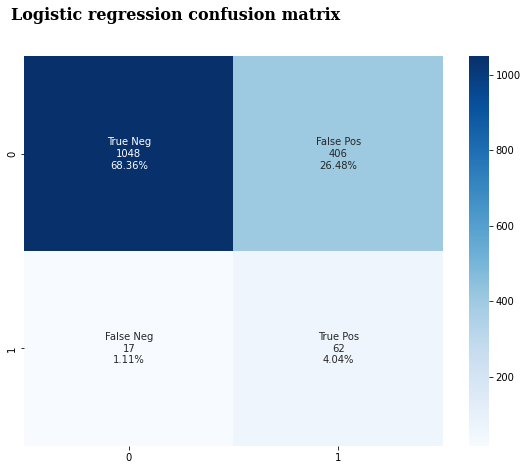

No Skill: ROC AUC=0.500
LightGBM: ROC AUC=0.822


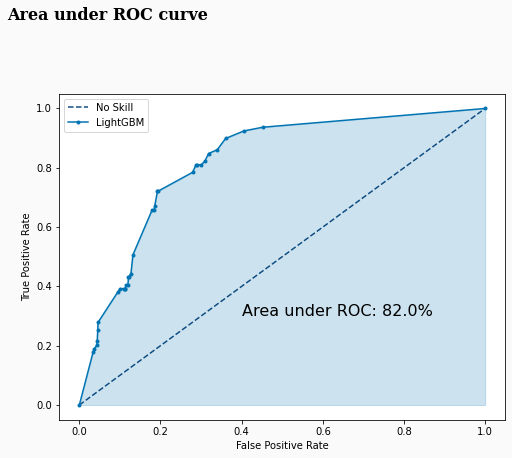

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**7.1 Confusion matrix and Area under the receiver operating characteristic**

model = models_minmax['LGBMClassifier__model']
print(params_minmax['LGBMClassifier__best_params'] )
#backtest
y_preds = model.predict(X_test_minmax[["age", "bmi", "avg_glucose_level"]])
y_probs = model.predict_proba(X_test_minmax[["age", "bmi", "avg_glucose_level"]])

backtest = list()

backtest.append((round(metrics.accuracy_score(y_test,y_preds),2))*100)
backtest.append((round(metrics.precision_score(y_test,y_preds),2))*100)
backtest.append((round(metrics.recall_score(y_test,y_preds),2))*100)
backtest.append((round(metrics.f1_score(y_test,y_preds),2))*100)
backtest.append((round (metrics.roc_auc_score(y_test,y_probs[:,1]), 2))*100)
backtest.append(metrics.confusion_matrix(y_test,y_preds))

results_df = pd.DataFrame({"Accuracy Score":backtest[0],"Precision Score":backtest[1],
                "Recall Score":backtest[2], "f1 Score":backtest[3],"AUC Score":backtest[4],
                "Algorithm":["LightGBM"]})

display(results_df)

cf_matrix = metrics.confusion_matrix(y_test, y_preds)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8,6)) 
fig.text(0.035, 1.05, f'Logistic regression confusion matrix', fontfamily='serif', fontsize=16, fontweight='bold')
fig.tight_layout()
sb.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.show()
plt.close()



# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = y_probs[:, 1]
# calculate scores
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LightGBM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)
# plot the roc curve for the model
fig, ax = plt.subplots(figsize=(8,6), facecolor="#fafafa" )
fig.text(0.035, 1.05, f'Area under ROC curve', fontfamily='serif', fontsize=16, fontweight='bold')

ax.plot(ns_fpr, ns_tpr, linestyle='--',color='#0f4c81', label='No Skill')
ax.plot(lr_fpr, lr_tpr, marker='.',color='#0074b3', label='LightGBM')
ax.fill_between(lr_fpr, lr_tpr, color='#0074b3', alpha=0.2)
# axis labels
ax.text(0.4, 0.3, "Area under ROC: " + str(round(lr_auc,2)*100) + "%", fontsize = 16)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
plt.close()

As we move along the different cutoff values from right to left, the shape of the roc curve is promising as there is no fall back, the model performns really well on the test set.

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**7.2 Prediction checking on test set**

X_test["pred"] = y_preds
X_test["stroke"] = y_test

checking = X_test[['pred', 'stroke', 'age', 'bmi', 'avg_glucose_level']]


display(checking[checking["pred"] != checking["stroke"]])

print("Mean of the avg_glucose_level: " + str(round(X_train['avg_glucose_level'].mean(), 2)))
print("Mean of the bmi: " + str(round(X_train['bmi'].mean(), 2)))
print("Mean of the age: " + str(round(X_train['age'].mean(), 2)))

,pred,stroke,age,bmi,avg_glucose_level
3716,1,0,69,31.4,59.31
735,1,0,73,27.9,84.11
917,1,0,57,40.2,81.15
4239,1,0,72,32.7,103.78
3794,1,0,78,25.9,79.84
...,...,...,...,...,...
647,1,0,58,34.7,82.01
3217,1,0,61,23.7,87.52
1178,1,0,59,32.8,226.11
4047,1,0,74,32.4,158.90


Mean of the avg_glucose_level: 106.13
Mean of the bmi: 28.77
Mean of the age: 43.32


It can be seen, that above the avergae values of the predictors, according to the captured relationship, the model falsely predicts stroke. That is why the precision not high. 

In [ ]:
#@title ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**7.3 Lets check those cases, when the model could not predict the stroke**

X_test["pred"] = y_preds
X_test["stroke"] = y_test

checking = X_test[['pred', 'stroke', 'age', 'bmi', 'avg_glucose_level']]

checking = checking[checking["stroke"] == 1]
display(checking[checking["pred"] != checking["stroke"]])

print("Ratio of the miss rate: "+ str(round( np.shape(checking)[0] / np.shape(X_test)[0] * 100, 2)))


,pred,stroke,age,bmi,avg_glucose_level
154,0,1,55,25.6,92.98
224,0,1,49,31.9,104.86
118,0,1,38,24.0,82.28
166,0,1,56,27.3,162.23
210,0,1,39,26.3,83.24
107,0,1,54,40.4,191.82
63,0,1,45,30.2,93.72
156,0,1,50,31.4,102.16
85,0,1,54,29.1,96.97
162,0,1,1,28.1,70.37


Ratio of the miss rate: 5.15


What can be seen here, is that younger (age under approx. 56) people were missed, and even tough it is regrettable, from modeler perspective it is a good result, as the model found all the people above the age of 56, where the occurence is likely.

#**8.0 Conclusions**

###**The provided highly imbalanced dataset was corrected successfully with SVM SMOTE technique. Null model was prevented.**

###**Models were tuned for trying to find as many stroke cases as possible, even if it cost to missclassify some non stroke cases. This can be seen from this moderately high accuracy, low precision, high auroc, and really high recall rate. Analyzing different cut off values is not neccesary here, since the model properly minimized the 1 - recall rate while keeping the accuracy high, which was the goal here. Using different cut off value could raise the accuracy, but giving up on the recall rate, which can not be the intention.**

###**The purpose of this, that the model should not miss out anyone, with a slight chance of having a stroke, and this model should serve as a decision supporting system, to potentially warn the medicals to examine the patient in order to prevent such a case. Therefore this final model could serve its duty.**



